In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import urllib.request
import json
import networkx as nx
from fa2 import ForceAtlas2
from itertools import count
from collections import Counter
from itertools import count

In [4]:
#!pip install lyricsgenius

     |████████████████████████████████| 59 kB 3.2 MB/s 


# Motivation

Our project aims to analyse the best music throught time using network and nlp tools learned in the class "Social Graphs and Interactions".  
That data set we will analyse, is based on Rolling Stones' Magazine 2021 list of top 500 songs of all time. Many times before music has been analysed, but we want to see if creative applications of the tools form class can give new insides to the history of music. The list from Rolling Stones' Magazine seems like an approriate choice to select the 500 greatest songs. See how the songs were chosen in the link below.   
We hope that the reader will get new insights to how music has changed (or has not?) throughout the years.  

In the following we will first do a network analysis of the artists from the top 500 as well as the genres the play.  Later we will make a sentiment analysis of songs from each decade to see how this change through time.    

The top 500 list: https://www.rollingstone.com/music/music-lists/best-songs-of-all-time-1224767/  
How is the list made: https://www.rollingstone.com/music/music-news/500-greatest-songs-voters-list-1225358/  

# Content
- Get data
- Overview of data
- Graph of all artists on the top 500
- Graph of artists for each decade
- Graph of all genres on the top 500
- Graph of genres for each decade

# Contributon
We helped each other, but the main responsibilities were:  
- Haonan: Webpage  
- Sarah: Movie + Textanalysis  
- Mads: Network analysis + extracting genres from wiki  

# Basic stats and getting the data

We used the following excel file containing the songs, the artists, the year, and the rank on the top 500.  
We then extracted genre information from the artists Wikipedia pages. Some pages were not easy to access automatically. So we found the page names corresponding to the artists ourselvs.  


## Get list of artists on the top 500 songs of all time

In [6]:
all_artists = pd.read_excel('top500songs.xlsx')

In [7]:
all_artists.head()

Rank                     Song           Artist  Year
0     1                  Respect  Aretha Franklin  1967
1     2          Fight the Power     Public Enemy  1989
2     3   A Change is Gonna Come        Sam Cooke  1964
3     4     Like a Rolling Stone        Bob Dylan  1965
4     5  Smells Like Teen Spirit          Nirvana  1991

## Wikipedia API

Function to extract artist page from Wikipedia

In [8]:
def get_artist_wikipedia(char, counter):
    counter = counter + 1
    if(counter > 3):
        return([])
    if(char == 'Nirvana'):
        char = 'Nirvana_(band)'
    if(char == 'Guns ‘N’ Roses'):
        char = 'Guns_N%27_Roses'
    if(char == 'Guns ‘n’ Roses'):
        char = 'Guns_N%27_Roses'
    if(char == 'Beach Boys'):
        char = 'The_Beach_Boys'
    if(char == 'Stones'):
        char = 'The_Rolling_Stones'
    #if(char == 'Rolling Stones'):
     #   char = 'The_Rolling_Stones'
    if(char == 'Ronettes'):
        char = 'The_Ronettes'
    if(char == 'Queen'):
        char = 'Queen_(band)' 
    if(char == 'Notorious B.I.G.'):
        char = 'The_Notorious_B.I.G.'
    if(char == 'Prince'):
        char = 'Prince_(musician)'
    if(char == 'M.I.A.'):
        char = 'M.I.A._(rapper)'
    if(char == 'Earth, Wind & Fire'):
        char = 'Earth,_Wind_%26_Fire'
    if(char == 'Simon and Garfunkel'):
        char = 'Simon_%26_Garfunkel'
    if(char == 'Chic'):
        char = 'Chic_(band)'
    if(char == 'The Four Tops'):
        char = 'Four Tops'
    if(char == 'Impressions'):
        char = 'The_Impressions'
    if(char == 'Drake'):
        char = 'Drake_(musician)'
    if(char == 'Eric B. and Rakim'):
        char = 'Eric_B._%26_Rakim'
    if(char == 'The Kinsgmen'):
        char = 'The Kingsmen'
    if(char == 'Meters'):
        char = 'The_Meters'
    if(char == 'Ike and Tina Turner'):
        char = 'Ike_%26_Tina_Turner'
    if(char == 'Crosby, Stills & Nash'):
        char = 'Crosby,_Stills,_Nash_%26_Young'
    if(char == 'Destiny’s Child'):
        char = 'Destiny%27s_Child'
    if(char == 'Hall and Oates'):
        char = 'Hall_%26_Oates'
    if(char == 'Zombies'):
        char = 'The_Zombies'
    if(char == 'Drifters'):
        char = 'The_Drifters'
    if(char == 'Allman Brother’s Band'):
        char = 'The_Allman_Brothers_Band'
    if(char == 'Queen and David Bowie'):
        char = 'Queen' # also David Bowie
    if(char == 'Peter Rock and CL Smooth'):
        char = 'Pete_Rock_%26_CL_Smooth'
    if(char == 'Megan Thee Stallion feat. Beyonce'):
        char = 'Megan_Thee_Stallion' # also Beyonce
    if(char == 'D’Angelo'):
        char = 'D%27Angelo' 
        
    if(char == 'Usher'):
        return(['R&B', 'pop'])
    if(char == 'Sylvester'):
        return(['Dance', 'Hi-NRG', 'R&B', 'disco', 'soul', 'funk'])
    if(char == 'Booker T'):
        return(['R&B', 'Memphis', 'soul', 'funk', 'Southern soul', 'soul jazz', 'instrumental rock'])
    if(char == 'Mazzy Star'):
        return(['Alternative rock', 'blues rock', 'dream pop', 'folk', 'neo-psychedelia'])
    if(char == 'Dixie Chicks'):
        return(['Country', 'americana', 'alternative country', 'folk', 'bluegrass', 'country pop'])
    if(char == 'Solange'):
        return(['R&B', 'pop', 'hip hop', 'funk', 'soul'])
    if(char == 'Nilsson'):
        return(['Rock', 'pop'])
    
    if(char == 'Beyonce'):
        return(['R&B', 'pop', 'hip hop', 'soul'])
    if(char == 'Sinead O’Connor'):
        return(['Alternative rock', 'pop rock', 'folk rock'])
    if(char == 'Howlin’ Wolf'):
        return(['Blues', 'Chicago blues', 'electric blues'])
    if(char == 'UKG'):
        return(['Hip hop', 'Southern hip hop', 'country rap'])
    if(char == 'Motorhead'):
        return(['Heavy metal', 'rock and roll', 'hard rock', 'speed metal'])
    if(char == 'Blue Oyster Cult'):
        return(['Hard rock', 'heavy metal', 'occult rock', 'progressive rock', 'psychedelic rock', 'acid rock'])


    
    char = char.replace(" ", "_")
    baseurl = "https://en.wikipedia.org/w/api.php?" # "https://en.wikipedia.org/w/api.php?"
    action = "action=query"
    title = f"titles={char}"
    content = "prop=revisions&rvprop=content&rvslots=*"
    dataformat ="format=json"

    query = "{}{}&{}&{}&{}".format(baseurl, action, content, title, dataformat)
    #print(query)
    wikiresponse = urllib.request.urlopen(query)
    wikidata = wikiresponse.read()
    wikitext = wikidata.decode('utf-8')

    artist_dict = json.loads(wikitext)
    if(len(str(artist_dict)) < 187):
        if('#REDIRECT' not in artist_dict):
            if('#redirect' not in artist_dict):
                #print(char)
                if('_(band)' not in char):
                    char_new = 'The_' + char
                else:
                    char_new = 'The_' + re.findall(r'[\s\S]*[^_(band)]', char)[0]
                #print(char_new)
                return(get_artist_wikipedia(char_new, counter))
    #if('ns' in list(artist_dict['query']['pages'].values())[0]):
    #    char_new = 'The_' + char
    #    return(get_artist_wikipedia(char_new))
    artist_page = list(artist_dict['query']['pages'].values())[0]['revisions'][0]['slots']['main']['*']
    if('#REDIRECT' in artist_page):
        redirected_page = re.findall(r'#REDIRECT\s*\[\[([^\]]*)\]\]', artist_page) # \s*\[\[\s\S\]\]
        return(get_artist_wikipedia(redirected_page[0], counter))
    if('#redirect' in artist_page):
        redirected_page = re.findall(r'#redirect\s*\[\[([^\]]*)\]\]', artist_page) # \s*\[\[\s\S\]\]
        return(get_artist_wikipedia(redirected_page[0], counter))
    if(f'[[{char} (band)]]' in artist_page):
        char_new = char + '_(band)'
        return(get_artist_wikipedia(char_new, counter))
    return(artist_page)

In [9]:
genres = [None]*500

In [10]:
for i in range(500): # should be 500, but right not only works up till 284(now it can work up till 335)
    artist_page = get_artist_wikipedia(all_artists.Artist[i], 0)
    if(type(artist_page)!=list):
        genre_text = re.findall(r'[Gg]enre\s*\=[\s\S]*?=', artist_page)
        if(len(genre_text)==0):
            char = all_artists.Artist[i]
            char = char + '_(band)' # (musician)
            artist_page = get_artist_wikipedia(char, 1)
            if(type(artist_page)!=list):
                genre_text = re.findall(r'genre\s*\=[\s\S]*?=', artist_page)
        if(type(artist_page)!=list):
            genre = re.findall(r'\[\[([\w\s\|\&]*?)\]\]', genre_text[0])
            genres[i] = genre
    else:
        genres[i] = []

Flamingos_(band)
The_Flamingos
Funky_4_+_1
The_Funky_4_+_1
The_Funky_4_+_1
The_The_Funky_4_+_1
Juvenile_(band)
The_Juvenile


Some genres are on the form "genre music"|genre. We turn these into "genre".
Convert to lower case.

In [11]:
genres2 = genres.copy()
for i in range(500):
    sublist = genres2[i]
    if(sublist is not None):
        if(len(sublist)>0):
            for j in range(len(sublist)):
                genres2[i][j] = genres2[i][j].lower()
                if("|" in genres2[i][j]):
                    genres2[i][j] = genres2[i][j].partition("|")[2]

# Overview of data

Make a list of all genres with repetitions:

In [12]:
flat_list_2 = [item for sublist in genres2 for item in sublist]

Number of unique genres:

In [13]:
nr_unique_genres = len(set(flat_list_2))
nr_unique_genres

196

Count each genre (i.e. the number of artists playing that gerne) and print the top genres.

In [14]:
dicti=Counter(flat_list_2)
pd_df = pd.DataFrame(list(dicti.items()))
pd_df.columns =["Dim","Count"]
# sort df by Count column
pd_df = pd_df.sort_values(['Count']).reset_index(drop=True)

print(pd_df[(nr_unique_genres-20):nr_unique_genres])

                  Dim  Count
176         folk rock     19
177          art rock     20
178         punk rock     21
179             disco     26
180              jazz     28
181          new wave     31
182              folk     32
183          pop rock     34
184              funk     39
185            gospel     39
186           country     39
187     rock and roll     40
188  alternative rock     40
189         hard rock     40
190             blues     44
191           hip hop     56
192              soul     88
193               r&b    111
194              rock    114
195               pop    127


Plot count of each genre:

/Users/madskerrn/anaconda3/envs/social-graphs-3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


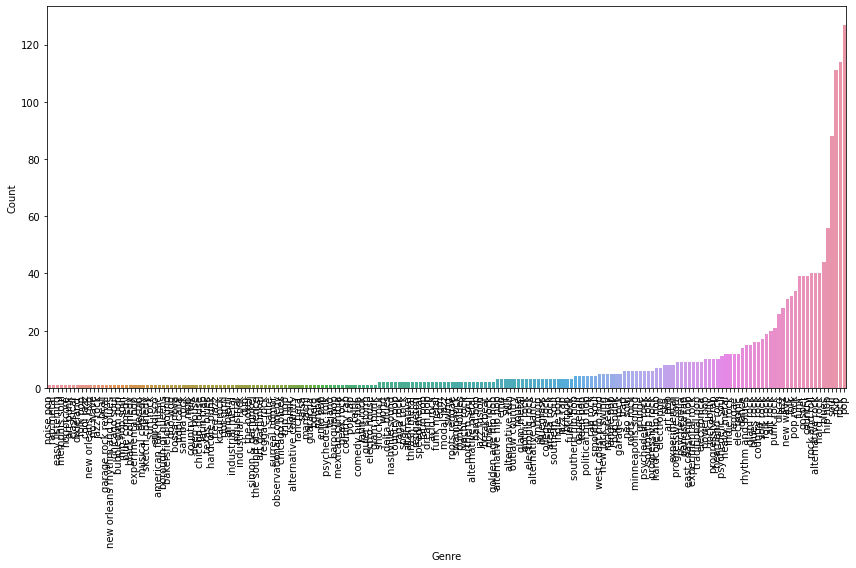

In [15]:
plt.figure(figsize=(12,8))
# plot barh chart with index as x values
ax = sns.barplot(pd_df.index, pd_df.Count)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Genre", ylabel='Count')
# add proper Dim values as x labels
ax.set_xticklabels(pd_df.Dim)
for item in ax.get_xticklabels(): item.set_rotation(90)
#for i, v in enumerate(pd_df["Count"].iteritems()):        
#    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

Its hard to read all of them, so here we examine the genres played by at least 10 artists:

/Users/madskerrn/anaconda3/envs/social-graphs-3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


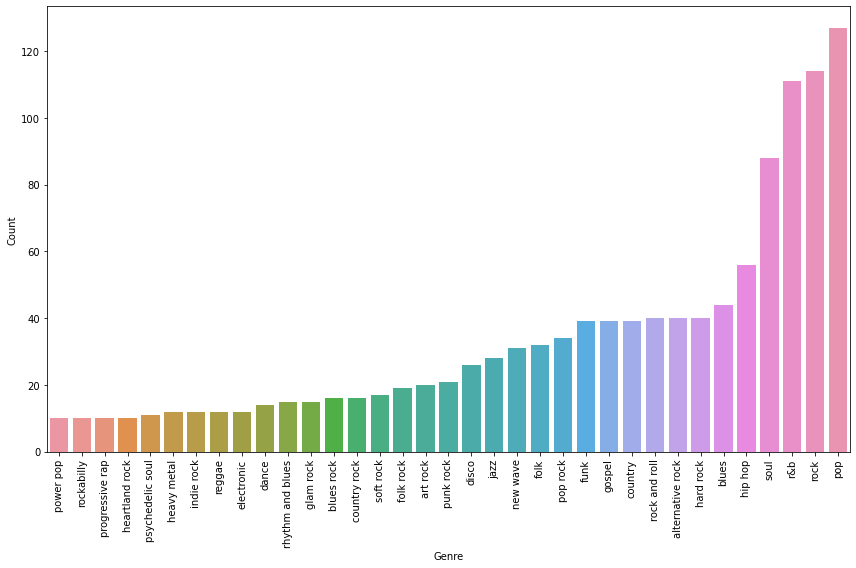

In [22]:
pd_df_only_top = pd_df[pd_df.Count >= 10]

plt.figure(figsize=(12,8))
# plot barh chart with index as x values
ax = sns.barplot(pd_df_only_top.index, pd_df_only_top.Count)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set(xlabel="Genre", ylabel='Count')
# add proper Dim values as x labels
ax.set_xticklabels(pd_df_only_top.Dim)
for item in ax.get_xticklabels(): item.set_rotation(90)
#for i, v in enumerate(pd_df_only_top["Count"].iteritems()):        
#    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()
plt.show()

In [23]:
artists_sub = all_artists.copy()
artists_sub['genre'] = genres2

# Graph of all artists on the top 500

We are interested to see how the artists connect through the genres, they play.  
We color the nodes, first by year (of the songs), then by rank.  
Do we see any tendensies in the graph? Are there any groupings indicated by year og rank?  

We fit the graph using the networkx library and plot it.  

Create graph with nodes and edges

In [24]:
G = nx.Graph()
G.add_nodes_from(artists_sub['Artist'])
nodes_in_graph = list(G.nodes())
N = len(nodes_in_graph)
for i in range(N):
    links = []
    node = nodes_in_graph[i]
    genres = artists_sub.iloc[i,4]
    for j in range(N):
        if(j!=i):
            genresB = artists_sub.iloc[j,4]
            if(any(map(lambda v: v in genresB, genres))):
                edge_attr = [w for w in genres if w in genresB] # new
                # links.append(nodes_in_graph[j])
                count_edge_attr = pd_df.loc[pd_df['Dim'].isin(edge_attr)]
                edge_attr_single = count_edge_attr.nlargest(1, columns=['Count']).iloc[0,0]
                new_edge = nodes_in_graph[j] # new
                #new_edge = [(node, new_edge, {'genre' : edge_attr_single})] # new
                G.add_edge(node, new_edge, genre = edge_attr_single)
                #G.add_edges_from(new_edges) # new
    # new_edges = [(node, new_edge) for new_edge in links]
    # G.add_edges_from(new_edges)

Add Year and Rank attributes

In [25]:
year_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Year']].iterrows()}
nx.set_node_attributes(G, year_attribute, name="Year")

rank_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Rank']].iterrows()}
nx.set_node_attributes(G, rank_attribute, name="Rank")

Giant connected component

In [26]:
#G_giant = G.subgraph(list(nx.connected_components(G))[0])
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G_giant = G.subgraph(Gcc[0])
d = dict(G_giant.degree)

Plot graph

In [27]:
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=20.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

In [28]:
positions = forceatlas2.forceatlas2_networkx_layout(G_giant, pos=None, iterations=2000)

100%|██████████████████████████████████████| 2000/2000 [00:03<00:00, 518.03it/s]

BarnesHut Approximation  took  1.23  seconds
Repulsion forces  took  1.73  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.40  seconds
AdjustSpeedAndApplyForces step  took  0.17  seconds


In [29]:
colorYear = list(nx.get_node_attributes(G_giant,'Year').values())
colorRank = list(nx.get_node_attributes(G_giant,'Rank').values())

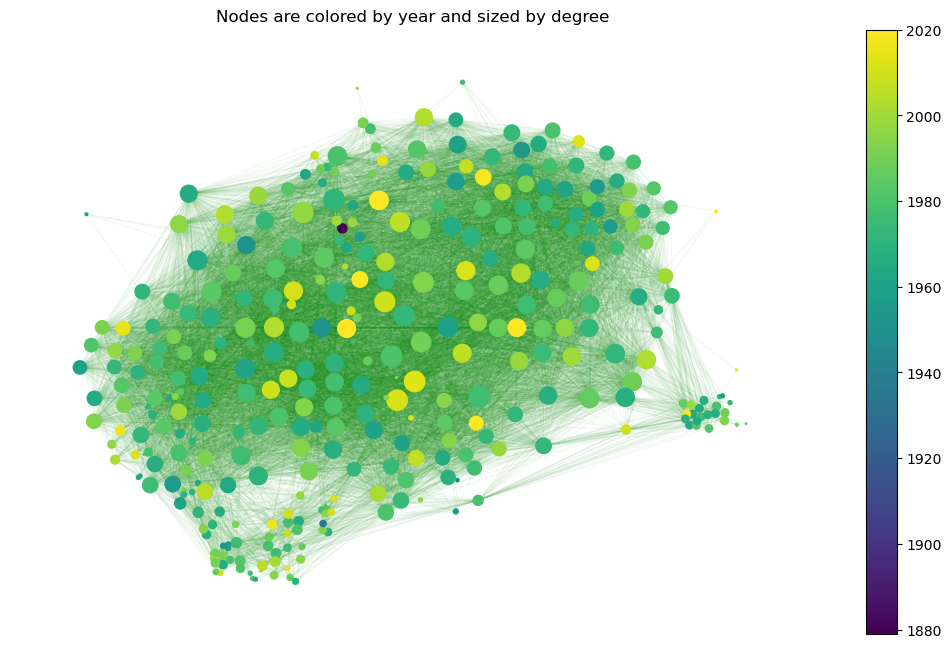

In [78]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, label = list(G_giant.nodes), 
                            node_color=colorYear, alpha=1, node_size=[v for v in d.values()])
nx.draw_networkx_edges(G_giant, positions, alpha = 0.05, edge_color='green')
#nx.draw_networkx_labels(G_giant, positions, nx.get_node_attributes(G_giant,'Rank'), font_size = 6, alpha = 0.4)
plt.colorbar(nc)
plt.axis('off')
plt.title('Nodes are colored by year and sized by degree')
plt.show()

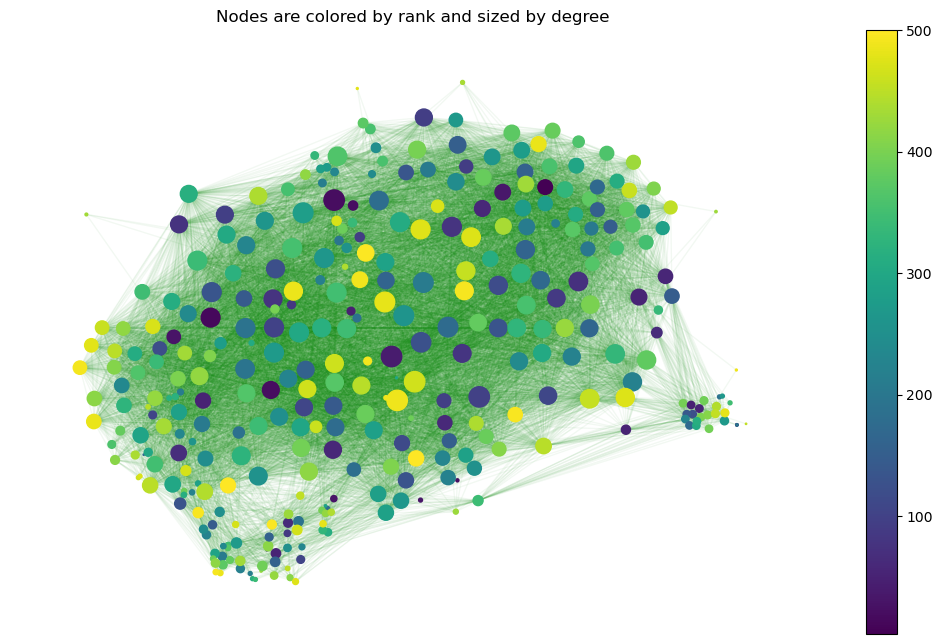

In [31]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, node_color=colorRank, alpha=1, node_size=[v for v in d.values()])
nx.draw_networkx_edges(G_giant, positions, alpha = 0.05, edge_color='green')
plt.colorbar(nc)
plt.title('Nodes are colored by rank and sized by degree')
plt.axis('off')
plt.show()

The graph is very conected, and it is hard to see any groupings of nodes, except a few.  
There does not seem to be any striking grouping in the graph representing rank or year.  
This indicates that the there has not been large changes in what combination of genres the top artists have played throughout the year. This might be due to the fact that the songs were picked in recent time.   

## Centrality

In this section we explore degree centrality and betweenness centrality of the graph as described in the Network Science Book.


http://networksciencebook.com/

Degree centrality indicates how close in genre an artist is to the rest. A low degree centrality indicates, that an artist is very different in terms of genre compared to the rest, while a high degree centrality indicates that an artists plays genres that is close to what most other are playing.  

In [91]:
degree_centrality = nx.degree_centrality(G_giant)

The artists with the highest degree centrality are:

In [103]:
high_deg_cen = list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5]
artists_sub[artists_sub.Artist.isin(high_deg_cen)]

Rank                     Song        Artist  Year  \
18     19                  Imagine   John Lennon  1971   
40     41  Love Will Tear Us Apart  Joy Division  1980   
98     99           ‘Stayin’ Alive      Bee Gees  1977   
464   465                Get Lucky     Daft Punk  2013   
487   488        House of Balloons    The Weeknd  2011   

                                       genre  
18                 [rock, pop, experimental]  
40                             [gothic rock]  
98       [pop, soul, disco, rock, soft rock]  
464        [house, electronic, dance, disco]  
487  [r&b, alternative r&b, pop, electropop]

The artists with the lowest degree centrality are:

In [104]:
low_deg_cen = list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=False)))[0:5]
artists_sub[artists_sub.Artist.isin(low_deg_cen)]

Rank                 Song          Artist  Year  \
44     45              Alright  Kendrick Lamar  2015   
83     84  Let’s Stay Together        Al Green  1971   
172   173         Marquee Moon      Television  1977   
273   274   Love and Happiness        Al Green  1972   
295   296           Rebel Girl     Bikini Kill  1996   
453   454              Bam Bam    Sister Nancy  1982   

                                         genre  
44        [hip hop, progressive rap, jazz rap]  
83          [soul, r&b, gospel, southern soul]  
172                 [rock, art punk, art rock]  
273         [soul, r&b, gospel, southern soul]  
295  [punk rock, alternative rock, riot grrrl]  
453          [dancehall, dancehall, dancehall]

Betweennes centrality is high if a node is often present in the shortest path for two other nodes.  
Betweennes centrality is high if an artist combines popular genres, that is rarely combined, and low if the artist playes few or unpopular genres.

In [99]:
betweenness_centrality = nx.betweenness_centrality(G_giant)

In [105]:
high_bet_cen = list(dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5]
artists_sub[artists_sub.Artist.isin(high_bet_cen)]

Rank                      Song               Artist  Year  \
179   180     Walk on the Wild Side             Lou Reed  1972   
269   270                    Closer      Nine Inch Nails  1994   
332   333  Papa Was a Rollin’ Stone      The Temptations  1972   
342   343      What a Fool Believes  The Doobie Brothers  1979   
456   457        Livin’ on a Prayer             Bon Jovi  1986   

                                                 genre  
179  [rock, experimental, glam rock, art rock, nois...  
269  [industrial rock, industrial, alternative rock...  
332                [r&b, soul, funk, psychedelic soul]  
342                                  [rock, soft rock]  
456      [glam metal, hard rock, arena rock, pop rock]

In [107]:
low_bet_deg = list(dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=False)))[0:5]
[artists_sub.Artist.isin(low_bet_deg)]

Rank                                  Song          Artist  Year  \
1       2                       Fight the Power    Public Enemy  1989   
9      10                              ‘Hey Ya!         Outkast  2003   
11     12                          Superstition   Stevie Wonder  1972   
17     18                           Purple Rain          Prince  1984   
20     21                         Strange Fruit  Billie Holiday  1939   
36     37                        When Doves Cry          Prince  1984   
38     39                                B.O.B.         Outkast  2000   
84     85                                  Kiss          Prince  1986   
112   113                         Higher Ground   Stevie Wonder  1973   
144   145                           Ms. Jackson         Outkast  2000   
182   183       You Are the Sunshine of My Life   Stevie Wonder  1972   
202   203  Signed, Sealed, Delivered, I’m Yours   Stevie Wonder  1970   
338   339                                  1999          Prince  1982   
359   360                   Little Red Corvette          Prince  1982   
396   397                       Bring the Noise    Public Enemy  1987   
430   431                                 Adore          Prince  1987   

                                                 genre  
1    [hip hop, political hip hop, east coast hip ho...  
9                                   [southern hip hop]  
11                                               [r&b]  
17   [rock, pop, new wave, r&b, minneapolis sound, ...  
20               [jazz, swing, blues, traditional pop]  
36   [rock, pop, new wave, r&b, minneapolis sound, ...  
38                                  [southern hip hop]  
84   [rock, pop, new wave, r&b, minneapolis sound, ...  
112                                              [r&b]  
144                                 [southern hip hop]  
182                                              [r&b]  
202                                              [r&b]  
338  [rock, pop, new wave, r&b, minneapolis sound, ...  
359  [rock, pop, new wave, r&b, minneapolis sound, ...  
396  [hip hop, political hip hop, east coast hip ho...  
430  [rock, pop, new wave, r&b, minneapolis sound, ...

In the list of high degree centrality some artists play popylar genres like pop and R&B, while another only plays gothic rock, which was unexpected.  

Some of the artists with a low betweennes centrality only play a single genre, which obviously gives a low betweennes centrality. Artists with a high betweennes centrality seem to combine unpopular genres with more popular once like rock, hip hop, and R&B.

## Statistics of the graph

We calculate some basic statistics for the graph. The statistics is for the graph containing all nodes (not just the largest connected component).

The number of nodes is

In [ ]:
G.number_of_nodes()

370

The number of edges is

In [ ]:
G.number_of_edges()

15417

The average degree is

In [ ]:
round(2*G.number_of_edges()/G.number_of_nodes(),2)

83.34

Degree distribution

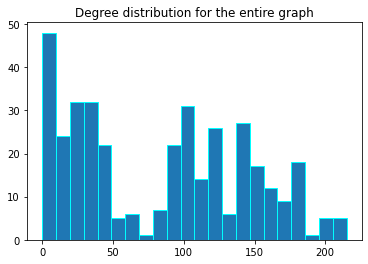

In [110]:
degrees = sorted(d for n, d in G.degree())
out1, out2 = np.histogram(degrees, bins=22)
bin_means = [np.mean(out2[i:(i+2)]) for i in range(len(out2)-1)]
width = out2[1]-out2[0]
plt.bar(bin_means, out1, width = width, edgecolor = "cyan")
plt.title("Degree distribution for the entire graph")
plt.show()

The average degree is rather high, which was also indicated by the graph plot above. The degree distribution also shows that many artists are extreamly well connected. This is due to the fact that many play the same popular genres, and often in combination. Therefore the centrality measures might be hard to interpret as many nodes are well connected.  

## Graph using only the most popular genres

Here we only look at the genres present in more than 40 artists, to examine how thise connect. We color the edges according to the gernre, they share. If they share multiple genres, we color by the most popular genre.

In [111]:
subgenres_high = list(pd_df[pd_df['Count']>40]['Dim'])
subgenres = subgenres_high
subgenres

['blues', 'hip hop', 'soul', 'r&b', 'rock', 'pop']

In [112]:
G_popular = nx.Graph()
G_popular.add_nodes_from(artists_sub['Artist'])
nodes_in_graph = list(G_popular.nodes())
N = len(nodes_in_graph)
for i in range(N):
    links = []
    node = nodes_in_graph[i]
    genres = [g for g in list(artists_sub.iloc[i,4]) if g in subgenres]
    for j in range(N):
        if(j!=i):
            genresB = [g for g in list(artists_sub.iloc[j,4]) if g in subgenres]
            if(any(map(lambda v: v in genresB, genres))):
                edge_attr = [w for w in genres if w in genresB] # new
                count_edge_attr = pd_df.loc[pd_df['Dim'].isin(edge_attr)]
                edge_attr_single = count_edge_attr.nlargest(1, columns=['Count']).iloc[0,0]
                new_edge = nodes_in_graph[j] # new
                G_popular.add_edge(node, new_edge, genre = edge_attr_single)

In [113]:
year_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Year']].iterrows()}
nx.set_node_attributes(G_popular, year_attribute, name="Year")

rank_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Rank']].iterrows()}
nx.set_node_attributes(G_popular, rank_attribute, name="Rank")

In [114]:
Gcc = sorted(nx.connected_components(G_popular), key=len, reverse=True)
G_giant = G_popular.subgraph(Gcc[0])
d = dict(G_giant.degree)

In [115]:
positions = forceatlas2.forceatlas2_networkx_layout(G_giant, pos=None, iterations=2000)

100%|██████████████████████████████████████| 2000/2000 [00:02<00:00, 930.26it/s]

BarnesHut Approximation  took  0.70  seconds
Repulsion forces  took  0.83  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.31  seconds
AdjustSpeedAndApplyForces step  took  0.11  seconds


In [116]:
colorYear = list(nx.get_node_attributes(G_giant,'Year').values())
colorRank = list(nx.get_node_attributes(G_giant,'Rank').values())

In [117]:
# from itertools import count
# get unique groups
groups = set(nx.get_edge_attributes(G_giant,'genre').values())
mapping = dict(zip(sorted(groups),count()))
edges = G_giant.edges(data=True)
colors = [mapping[data['genre']] for n1, n2, data in edges]

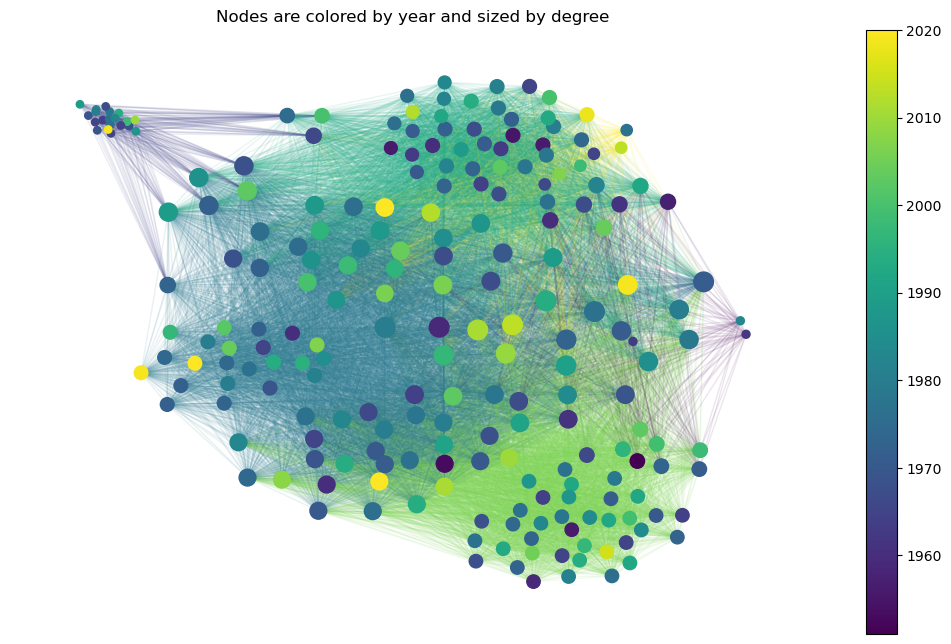

In [118]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, node_color=colorYear, alpha=1, node_size=[v for v in d.values()])
ec = nx.draw_networkx_edges(G_giant, positions, edge_color=colors, alpha = 0.1)
plt.colorbar(nc)
plt.axis('off')
plt.title('Nodes are colored by year and sized by degree')
plt.show()

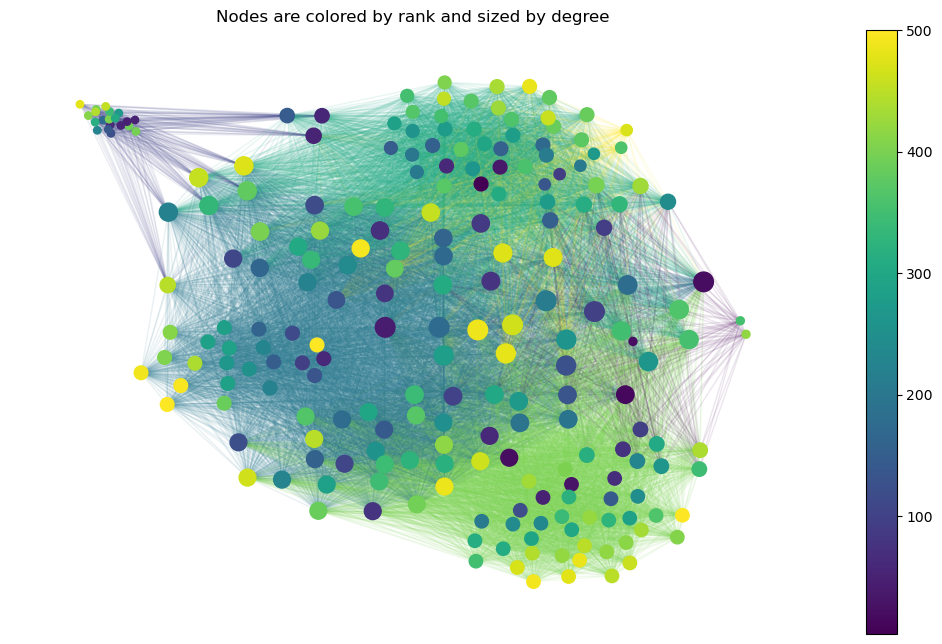

In [119]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, node_color=colorRank, alpha=1, node_size=[v for v in d.values()])
ec = nx.draw_networkx_edges(G_giant, positions, edge_color=colors, alpha = 0.1)
plt.colorbar(nc)
plt.title('Nodes are colored by rank and sized by degree')
plt.axis('off')
plt.show()

As expected these genres seem to be responsible for most of the connections in the graph. The sturecture has not changed a lot since the large graph.  

## Graph using only the least popular genres

Here we only look at the genres present in less than 17 artists, to see how the artists interact through these. We color the edges according to the gernre, they share. If they share multiple genres, we color by the most popular genre.

In [120]:
subgenres_low = list(pd_df[(pd_df['Count']<17)&(pd_df['Count']>1)]['Dim'])
subgenres = subgenres_low
print(subgenres)

['shock rock', 'world', 'delta blues', 'nashville sound', 'country pop', 'raga rock', 'space rock', 'alternative', 'thrash metal', 'reggaeton', 'speed metal', 'latin pop', 'dream pop', 'acid rock', 'funk metal', 'edm', 'modal jazz', 'swing', 'roots reggae', 'swamp rock', 'punk blues', 'yacht rock', 'northern soul', 'alternative metal', 'hard bop', 'jazz fusion', 'breakbeat', 'noise rock', 'golden age hip hop', 'alternative hip hop', 'emo', 'surf', 'alternative r&b', 'outlaw country', 'house', 'glam metal', 'gothic rock', 'electronic rock', 'alternative dance', 'synthpop', 'bluegrass', 'college rock', 'arena rock', 'southern soul', 'indie pop', 'jazz rap', 'britpop', 'funk rock', 'southern hip hop', 'dancehall', 'teen pop', 'political hip hop', 'rap rock', 'smooth soul', 'west coast hip hop', 'new jack swing', 'rocksteady', 'jangle pop', 'pop punk', 'garage rock', 'trap', 'neo soul', 'roots rock', 'minneapolis sound', 'grunge', 'psychedelic rock', 'southern rock', 'progressive rock', 'h

In [121]:
G_unpopular = nx.Graph()
G_unpopular.add_nodes_from(artists_sub['Artist'])
nodes_in_graph = list(G_unpopular.nodes())
N = len(nodes_in_graph)
for i in range(N):
    links = []
    node = nodes_in_graph[i]
    genres = [g for g in list(artists_sub.iloc[i,4]) if g in subgenres]
    for j in range(N):
        if(j!=i):
            genresB = [g for g in list(artists_sub.iloc[j,4]) if g in subgenres]
            if(any(map(lambda v: v in genresB, genres))):
                edge_attr = [w for w in genres if w in genresB] # new
                count_edge_attr = pd_df.loc[pd_df['Dim'].isin(edge_attr)]
                edge_attr_single = count_edge_attr.nlargest(1, columns=['Count']).iloc[0,0]
                new_edge = nodes_in_graph[j] # new
                G_unpopular.add_edge(node, new_edge, genre = edge_attr_single)

In [122]:
year_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Year']].iterrows()}
nx.set_node_attributes(G_unpopular, year_attribute, name="Year")

rank_attribute = {x:z for (a,(x,z)) in artists_sub[['Artist', 'Rank']].iterrows()}
nx.set_node_attributes(G_unpopular, rank_attribute, name="Rank")

In [123]:
Gcc = sorted(nx.connected_components(G_unpopular), key=len, reverse=True)
G_giant = G_unpopular.subgraph(Gcc[0])
d = dict(G_giant.degree)

In [124]:
positions = forceatlas2.forceatlas2_networkx_layout(G_giant, pos=None, iterations=2000)

100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 2097.73it/s]

BarnesHut Approximation  took  0.27  seconds
Repulsion forces  took  0.43  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.08  seconds


In [125]:
colorYear = list(nx.get_node_attributes(G_giant,'Year').values())
colorRank = list(nx.get_node_attributes(G_giant,'Rank').values())

In [126]:
# get unique groups
groups = set(nx.get_edge_attributes(G_giant,'genre').values())
mapping = dict(zip(sorted(groups),count()))
edges = G_giant.edges(data=True)
colors = [mapping[data['genre']] for n1, n2, data in edges]

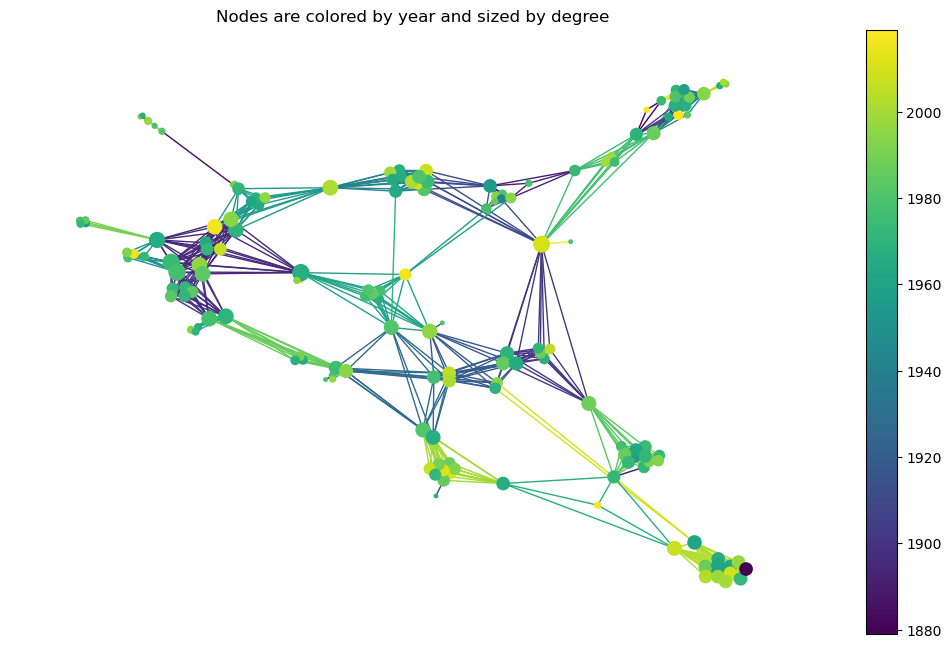

In [127]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, node_color=colorYear, alpha=1, node_size=[v * 6 for v in d.values()])
ec = nx.draw_networkx_edges(G_giant, positions, edge_color=colors, alpha = 1)
plt.colorbar(nc)
plt.axis('off')
plt.title('Nodes are colored by year and sized by degree')
plt.show()

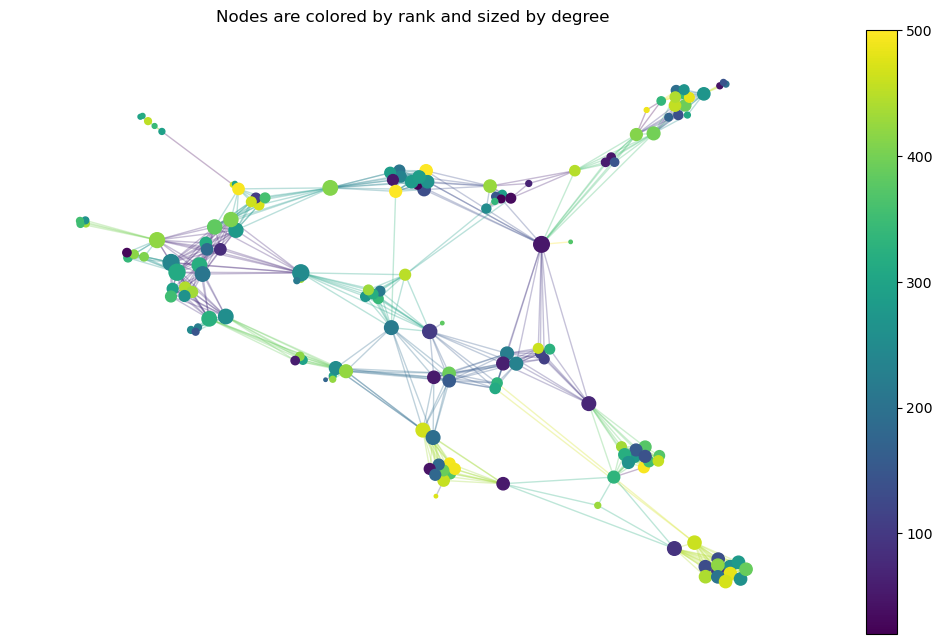

In [128]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nc = nx.draw_networkx_nodes(G_giant, positions, node_color=colorRank, alpha=1, node_size=[v * 6 for v in d.values()])
ec = nx.draw_networkx_edges(G_giant, positions, edge_color=colors, alpha = 0.3)
plt.colorbar(nc)
plt.title('Nodes are colored by rank and sized by degree')
plt.axis('off')
plt.show()

Using only the less popular genres, the artist seem to connect only to specific genres, that others also connect to. We see slightly less of a small world tendency, and more grouping of the artists.  

# Graph of artists for each decade
We make a graph for each decade and calculate some statistics to compare them. We want to explore how the graph differ between decades.

### Distribution of songs over the years

Most songs are between the 1950's and the 2010's. So this is what we will focus on.  

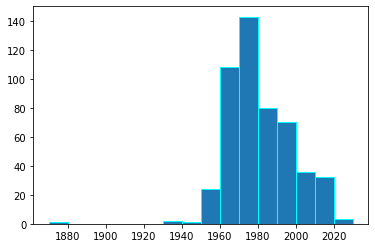

In [130]:
n_bins = int((2030-1870)/10)+1
v = np.linspace(1870, 2030, n_bins)
hist_P, bins_P = np.histogram(all_artists.Year, bins = v)

bins_mean = bins_P[1:]-5
plt.bar(bins_mean, hist_P, width = 10, edgecolor = "cyan")
plt.show()

In [131]:
def plt_graph(graph, xx = 1):
    GccGraph = sorted(nx.connected_components(graph), key=len, reverse=True)
    G_giant_graph = graph.subgraph(GccGraph[0])
    d = dict(G_giant_graph.degree)
    graph = G_giant_graph

    positions = forceatlas2.forceatlas2_networkx_layout(graph, pos=None, iterations=2000)

    colorYear = list(nx.get_node_attributes(graph,'Year').values())
    colorRank = list(nx.get_node_attributes(graph,'Rank').values())

    fig=plt.figure(figsize=(13,8), dpi= 100)
    nc = nx.draw_networkx_nodes(graph, positions, node_color=colorYear, alpha=1, node_size=[v*xx for v in d.values()])
    nx.draw_networkx_edges(graph, positions, alpha = 0.05, edge_color='green')
    plt.colorbar(nc)
    plt.axis('off')
    plt.title('Nodes are colored by year and sized by degree')
    plt.show()

In [132]:
def get_stats(graph):
    n_nodes = graph.number_of_nodes()
    n_edges = graph.number_of_edges()
    avg_deg = round(2*graph.number_of_edges()/graph.number_of_nodes(),2)
    print(f"Number of nodes: {n_nodes}")
    print(f"Number of edges: {n_edges}")
    print(f"Average degree: {avg_deg}")
    return([n_nodes, n_edges, avg_deg])

### The 50's

Number of nodes: 20
Number of edges: 45
Average degree: 4.5


100%|████████████████████████████████████| 2000/2000 [00:00<00:00, 35704.86it/s]

BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


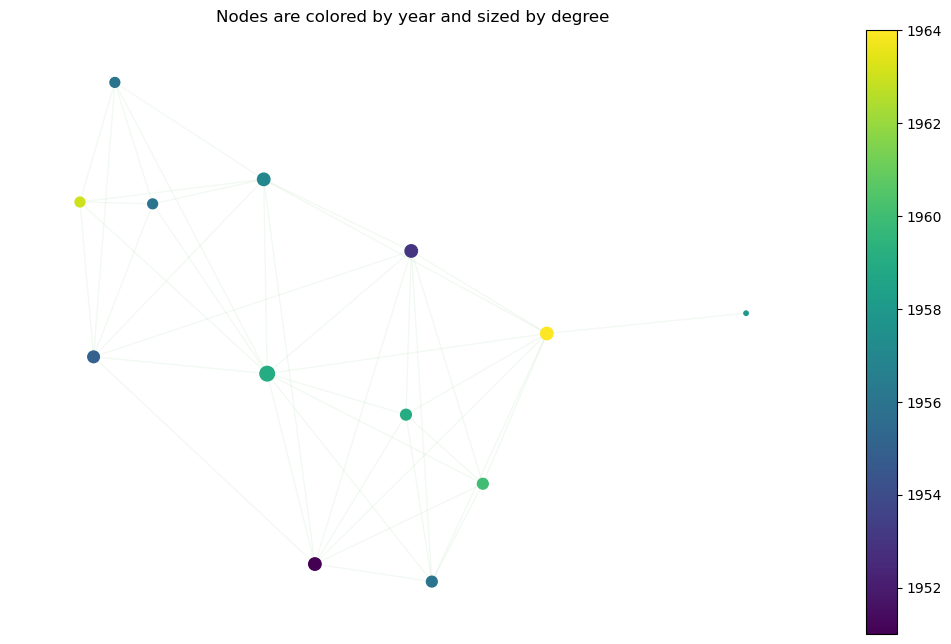

In [133]:
# Get artists from the 50s
artists_50s = all_artists[((all_artists.Year>=1950) & (all_artists.Year<1960))].Artist

# Extract subgraph
G_50s = G.subgraph(artists_50s)

# Stats
stat_50 = get_stats(G_50s)

# Plot graph
plt_graph(G_50s, xx=10)

### The 60's

Number of nodes: 78
Number of edges: 655
Average degree: 16.79


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 5192.96it/s]


BarnesHut Approximation  took  0.10  seconds
Repulsion forces  took  0.17  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


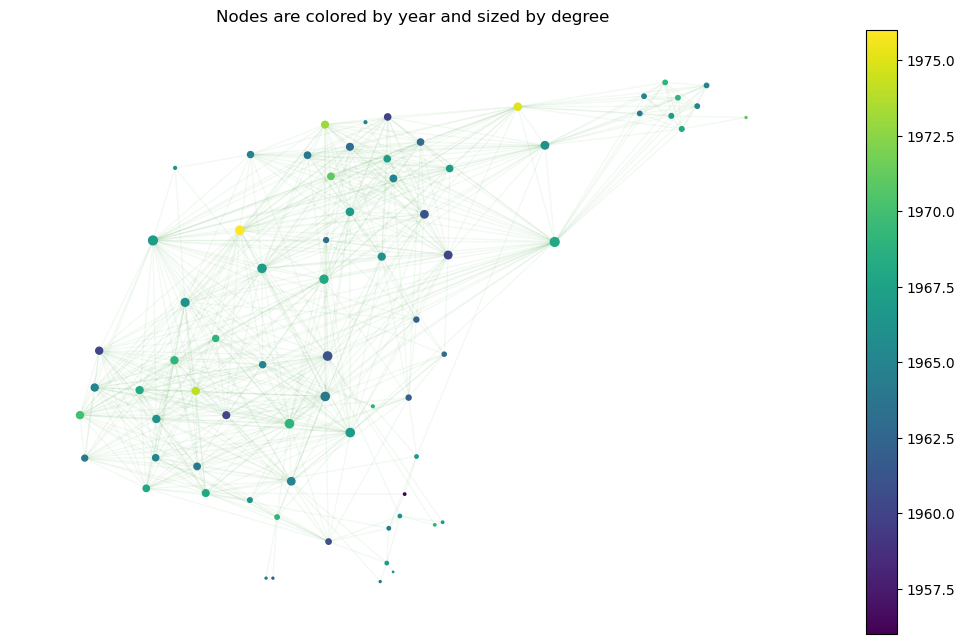

In [134]:
# Get artists from the 80s
artists_60s = all_artists[((all_artists.Year>=1960) & (all_artists.Year<1970))].Artist

# Extract subgraph
G_60s = G.subgraph(artists_60s)

# Stats
stat_60 = get_stats(G_60s)

# Plot graph
plt_graph(G_60s)

### The 70's

Number of nodes: 110
Number of edges: 1481
Average degree: 26.93


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 3272.71it/s]


BarnesHut Approximation  took  0.15  seconds
Repulsion forces  took  0.28  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.04  seconds
AdjustSpeedAndApplyForces step  took  0.05  seconds


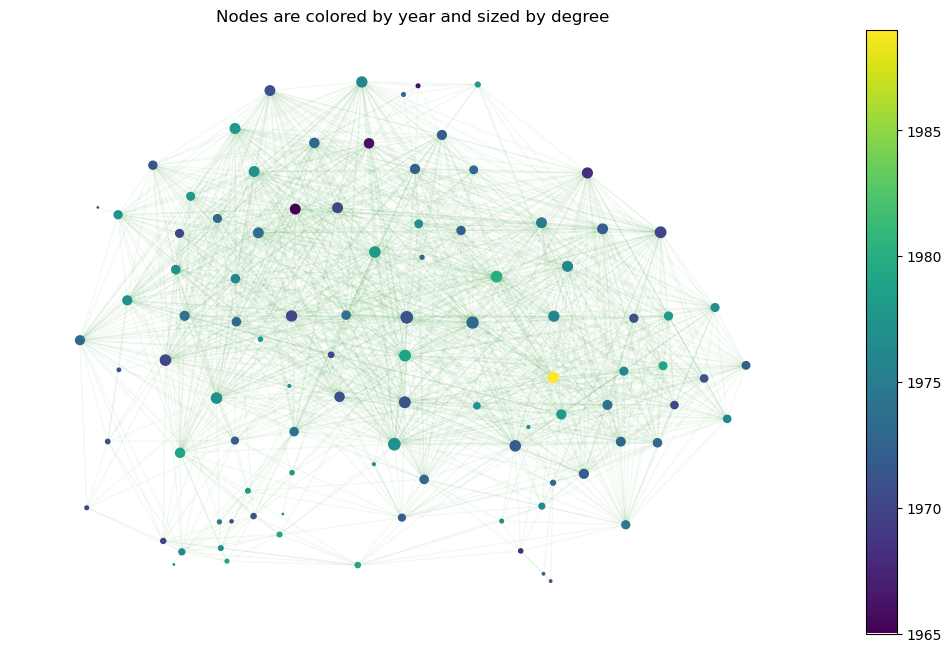

In [135]:
# Get artists from the 70s
artists_70s = all_artists[((all_artists.Year>=1970) & (all_artists.Year<1980))].Artist

# Extract subgraph
G_70s = G.subgraph(artists_70s)

# Stats
stat_70 = get_stats(G_70s)

# Plot graph
plt_graph(G_70s)

### The 80's

Number of nodes: 65
Number of edges: 574
Average degree: 17.66


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 5155.21it/s]


BarnesHut Approximation  took  0.10  seconds
Repulsion forces  took  0.17  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


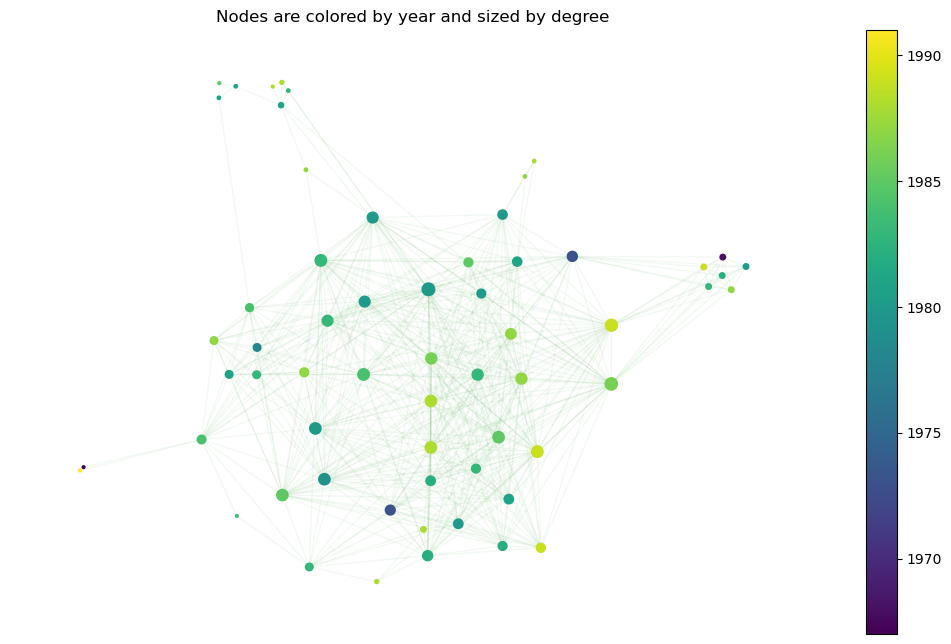

In [136]:
# Get artists from the 80s
artists_80s = all_artists[((all_artists.Year>=1980) & (all_artists.Year<1990))].Artist

# Extract subgraph
G_80s = G.subgraph(artists_80s)

# Stats
stat_80 = get_stats(G_80s)

# Plot graph
plt_graph(G_80s, xx=2)

### The 90's

Number of nodes: 66
Number of edges: 370
Average degree: 11.21


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 5558.13it/s]


BarnesHut Approximation  took  0.10  seconds
Repulsion forces  took  0.16  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


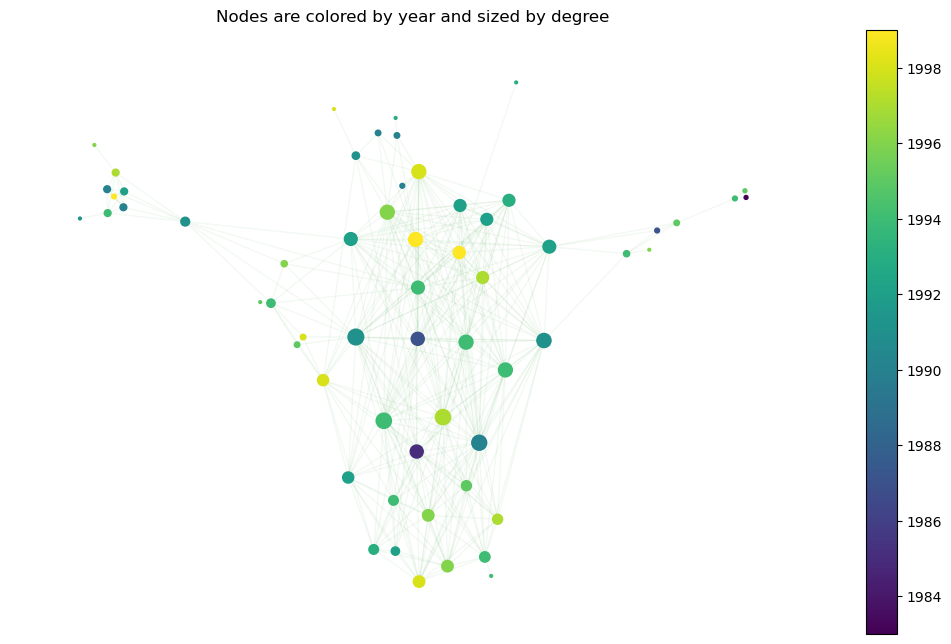

In [137]:
# Get artists from the 80s
artists_90s = all_artists[((all_artists.Year>=1990) & (all_artists.Year<2000))].Artist

# Extract subgraph
G_90s = G.subgraph(artists_90s)

# Stats
stat_90 = get_stats(G_90s)

# Plot graph
plt_graph(G_90s, xx=4)

### The 2000's

Number of nodes: 31
Number of edges: 168
Average degree: 10.84


100%|████████████████████████████████████| 2000/2000 [00:00<00:00, 12526.70it/s]

BarnesHut Approximation  took  0.04  seconds
Repulsion forces  took  0.06  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


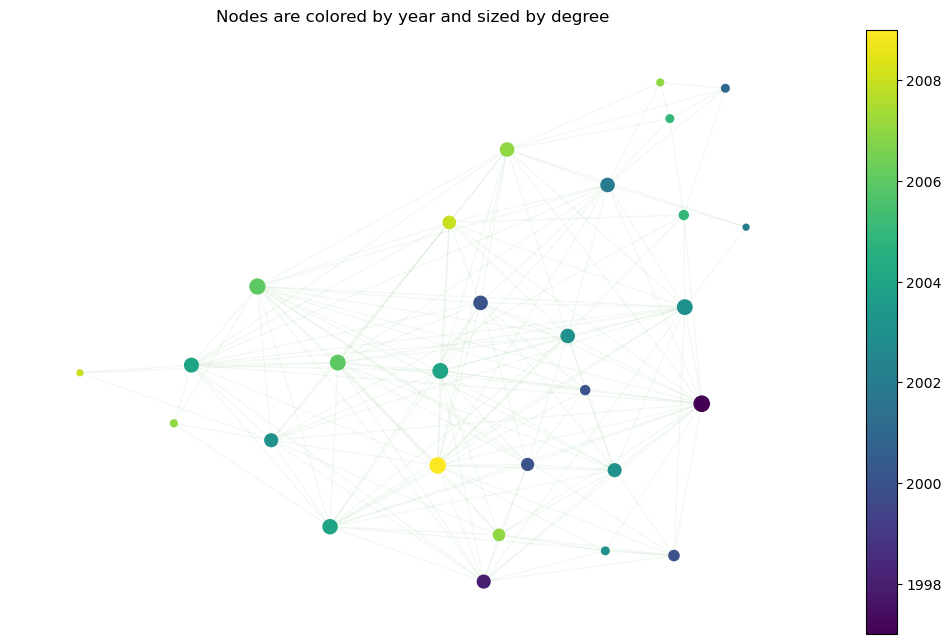

In [138]:
# Get artists from the 80s
artists_00s = all_artists[((all_artists.Year>=2000) & (all_artists.Year<2010))].Artist

# Extract subgraph
G_00s = G.subgraph(artists_00s)

# Stats
stat_00 = get_stats(G_00s)

# Plot graph
plt_graph(G_00s, xx=6)

### The 2010's

Number of nodes: 29
Number of edges: 79
Average degree: 5.45


100%|████████████████████████████████████| 2000/2000 [00:00<00:00, 19468.32it/s]

BarnesHut Approximation  took  0.02  seconds
Repulsion forces  took  0.03  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


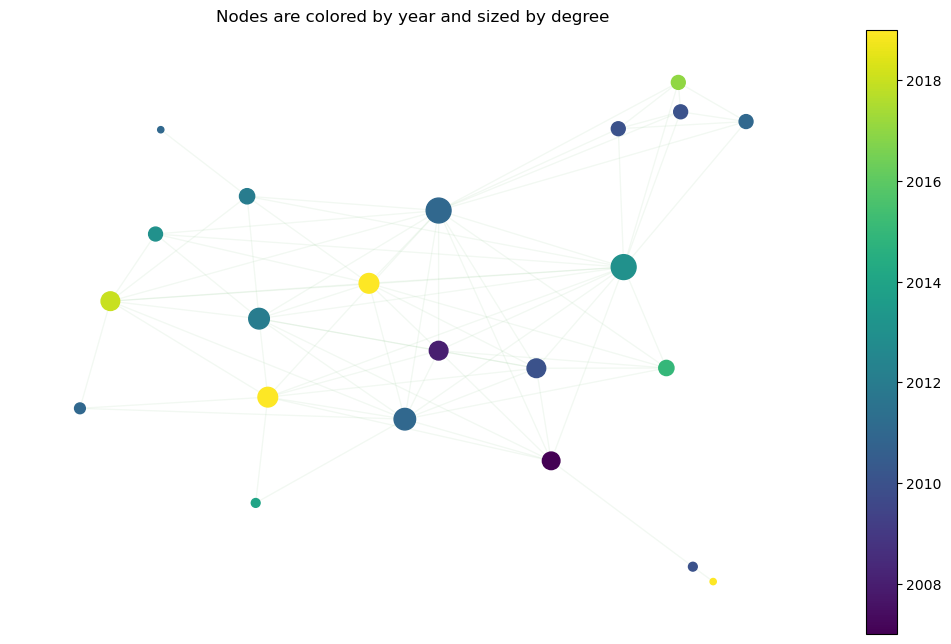

In [139]:
# Get artists from the 80s
artists_10s = all_artists[((all_artists.Year>=2010) & (all_artists.Year<2020))].Artist

# Extract subgraph
G_10s = G.subgraph(artists_10s)

# Stats
stat_10 = get_stats(G_10s)

# Plot graph
plt_graph(G_10s, xx=20)

In [140]:
stat_decades = pd.DataFrame({'50' : stat_50, '60' : stat_60, '70' : stat_70, '80' : stat_80, 
                             '90' : stat_90, '00' : stat_00, '10' : stat_10})

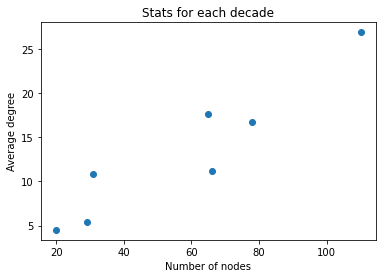

In [141]:
plt.scatter(stat_decades.iloc[0,:], stat_decades.iloc[2,:])
plt.title('Stats for each decade')
plt.xlabel('Number of nodes')
plt.ylabel('Average degree')
plt.show()

Average degree increases as the number of nodes increases. This makes sense, as the more songs there are from a decade, the higher is the probability that a genre is shared by at least two songs. It is hard to distinguish the graphs as the number of nodes differs and the degree follows linearly.  
However, it seems like the list prioritizes music between 1960-1999.  

# Graph for genres
Next, we want to explore how the genres connect. We make a graph with genres as nodes and draw an edge if two genres are played by at least one artist.  
We use the same tools as above.  

In [142]:
G_genre = nx.Graph()
G_genre.add_nodes_from(flat_list_2)

In [143]:
nodes_in_graph = list(G_genre.nodes())
N = len(nodes_in_graph)
for i in range(500):
    genres_i = artists_sub.genre[i]
    K = len(genres_i)
    if(K>1):
        for j in range(K):
            for k in range(j+1,K):
                if(genres_i[j] != genres_i[k]):
                    G_genre.add_edge(genres_i[j], genres_i[k])

In [144]:
G_genre_CC = sorted(nx.connected_components(G_genre), key=len, reverse=True)
G_genre_giant = G_genre.subgraph(G_genre_CC[0])
d = dict(G_genre_giant.degree)

In [145]:
positions = forceatlas2.forceatlas2_networkx_layout(G_genre_giant, pos=None, iterations=2000)

100%|█████████████████████████████████████| 2000/2000 [00:01<00:00, 1286.30it/s]

BarnesHut Approximation  took  0.59  seconds
Repulsion forces  took  0.69  seconds
Gravitational forces  took  0.02  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.09  seconds


In [196]:
K = 15
genres_pop = {k:v for (k,v) in dict(G_genre_giant.degree).items() if v>K}
names_genres_pop = {k:k for (k,v) in genres_pop.items()}
popular_genres = list(genres_pop.keys())
bob = G_genre_giant.subgraph(popular_genres)

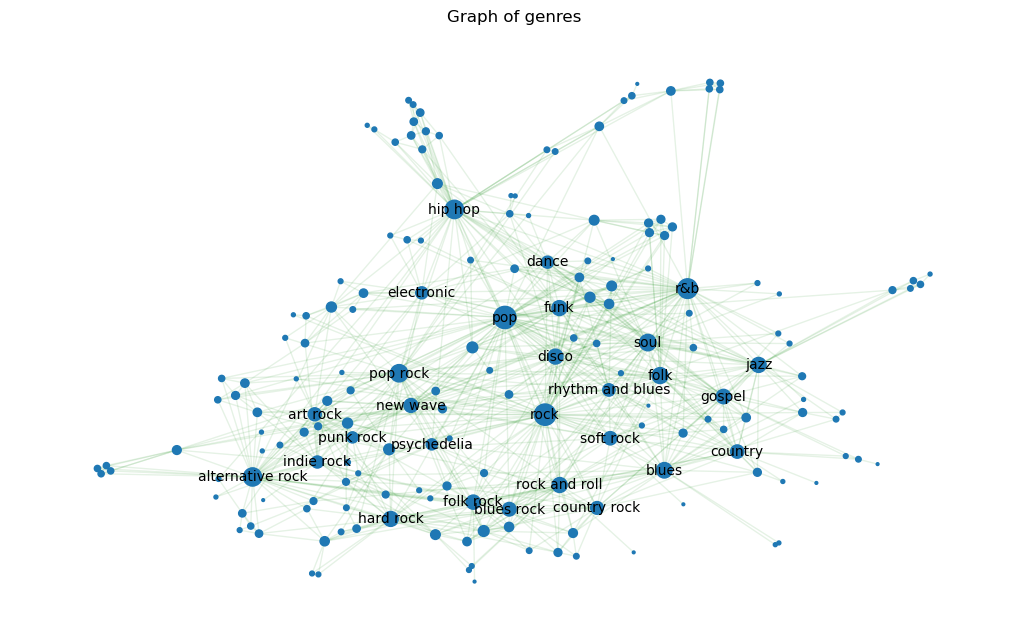

In [200]:
fig=plt.figure(figsize=(13,8), dpi= 100)
nx.draw_networkx_nodes(G_genre_giant, positions, node_size=[v*4 for v in d.values()])
#nx.draw_networkx_nodes(bob, positions, label = list(G_genre_giant.nodes), 
#                            node_color='red', alpha=1, node_size=20)
nx.draw_networkx_labels(bob, positions, names_genres_pop, font_size = 10)

nx.draw_networkx_edges(G_genre_giant, positions, alpha = 0.1, edge_color='green')
plt.axis('off')
plt.title('Graph of genres')
plt.show()

We see that rock-like genres are located in the lower-left part of the graph. Classic genres like jazz, blues, and gospel are located to the right, while more modern gernes like hip hop, electronic, pop, dance, and funk are in the top. Hence it seems like the genres mostly connect to similar genres. There is however, edges breaking the tendency indicating that many artists combine genres from different areas.  

## Centrality for genre graph

Degree centrality indicates how close a genere is to the rest in a specific sense. A low degree centrality indicates, that a genre rarely combined with other genres, while a high degree centrality indicates that a genre that is often combined with other genres, that are also often combined with the rest.  

We expect betweenness centrality to indicate if a genre is combined with other genres that are not combined.

In [201]:
degree_centrality = nx.degree_centrality(G_genre_giant)

The genres with the highest degree centrality are:

In [202]:
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

['pop', 'rock', 'r&b', 'hip hop', 'alternative rock']


The genres with the lowest degree centrality are:

In [203]:
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=False)))[0:5])

['new orleans rhythm and blues', 'garage rock revival', 'new orleans r&b', 'folk pop', 'nashville sound']


In [204]:
betweenness_centrality = nx.betweenness_centrality(G_genre_giant)

The gernes with the highest betweenness centrality:

In [205]:
print(list(dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

['hip hop', 'pop', 'rock', 'alternative rock', 'r&b']


The gernes with the lowest betweenness centrality:

In [206]:
print(list(dict(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=False)))[0:5])

['southern hip hop', 'surf', 'minneapolis sound', 'gothic rock', 'rocksteady']


The genres with the highest degree centrality are also the most played genres, which seems reasonable, as if more artists play a genre, it is also more likley to be combined with other genres.

The genres with the highest betweenness centrality are also the most played genres. This also seems reasonable as many artists would play the popular genres and combine these with other genres.

## Statistics for genre graph

We calculate some basic statistics for the graph. The statistics is for the graph containing all nodes (not just the largest connected component).

Number of nodes

In [207]:
G_genre.number_of_nodes()

196

Number of edges

In [208]:
G_genre.number_of_edges()

861

The average degree is

In [209]:
round(2*G_genre.number_of_edges()/G_genre.number_of_nodes(),2)

8.79

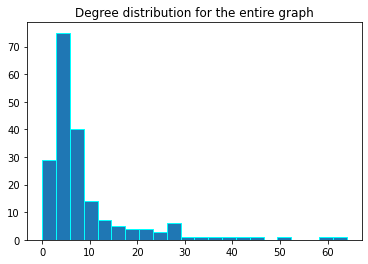

In [211]:
degrees = sorted(d for n, d in G_genre.degree())
out1, out2 = np.histogram(degrees, bins=22)
bin_means = [np.mean(out2[i:(i+2)]) for i in range(len(out2)-1)]
width = out2[1]-out2[0]
plt.bar(bin_means, out1, width = width, edgecolor = "cyan")
plt.title("Degree distribution for the entire graph")
plt.show()

Compared to the artist degree distribution, the genres degree distribution is less uniform. Most genres are played by few and a few popular genres are played by many.

# Genres for each decade

We make a graph of genres, like the one above, but for each decade from the 1950's to the 2010's. We wish to explore any changes in how genres are combined throughout the years. We use the usual networkx tools to generate the graphs. For each graph we counte the number of nodes and edges and calculate the average degree.  

In [238]:
def create_genre_decade_graph(deca):
    artists_deca = artists_sub[(artists_sub.Year >= deca) & (artists_sub.Year < (deca+10))]
    genres_decade = artists_deca['genre']
    flat_list_decade = [item for sublist in genres_decade for item in sublist]

    G_genre_deca = nx.Graph()
    G_genre_deca.add_nodes_from(flat_list_decade)
    nodes_in_graph = list(G_genre_deca.nodes())
    N = len(nodes_in_graph)
    for i in range(len(artists_deca)):
        genres_i = artists_deca.genre.iloc[i]
        K = len(genres_i)
        if(K>1):
            for j in range(K):
                for k in range(j+1,K):
                    if(genres_i[j] != genres_i[k]):
                        G_genre_deca.add_edge(genres_i[j], genres_i[k])
    return(G_genre_deca)

In [239]:
def plt_graph_genre(G_genre_deca):
    G_genre_deca_CC = sorted(nx.connected_components(G_genre_deca), key=len, reverse=True)
    G_genre_deca_giant = G_genre.subgraph(G_genre_deca_CC[0])
    d = dict(G_genre_deca_giant.degree)

    positions = forceatlas2.forceatlas2_networkx_layout(G_genre_deca_giant, pos=None, iterations=2000)

    fig=plt.figure(figsize=(13,8), dpi= 100)
    nx.draw_networkx_nodes(G_genre_deca_giant, positions, node_size=[v*4 for v in d.values()])
    nx.draw_networkx_edges(G_genre_deca_giant, positions, alpha = 0.3, edge_color='green')
    plt.axis('off')
    plt.title('Graph of genres')
    plt.show()

Number of nodes: 21
Number of edges: 55
Average degree: 5.24


100%|████████████████████████████████████| 2000/2000 [00:00<00:00, 24095.43it/s]

BarnesHut Approximation  took  0.02  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


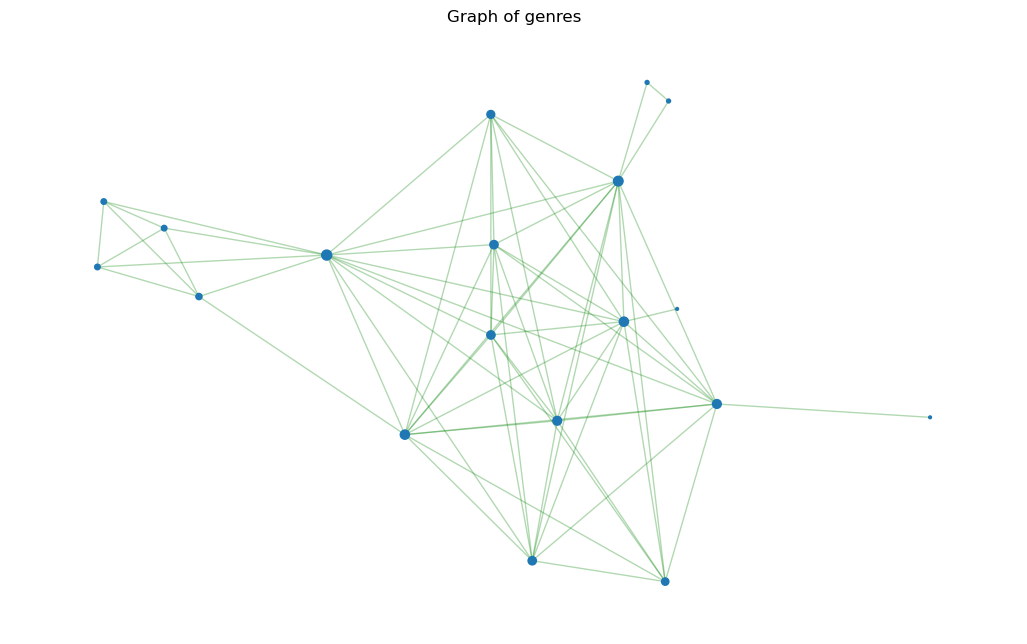

The genres with the largest degree centrality of the decade is:
['blues', 'rock and roll', 'jazz', 'gospel', 'country']


In [240]:
# Create graph
g_genre_50 = create_genre_decade_graph(1950)

# Stats
stat_genre_50 = get_stats(g_genre_50)

# Plot
plt_graph_genre(g_genre_50)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_50)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 58
Number of edges: 203
Average degree: 7.0


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 6849.13it/s]


BarnesHut Approximation  took  0.07  seconds
Repulsion forces  took  0.13  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


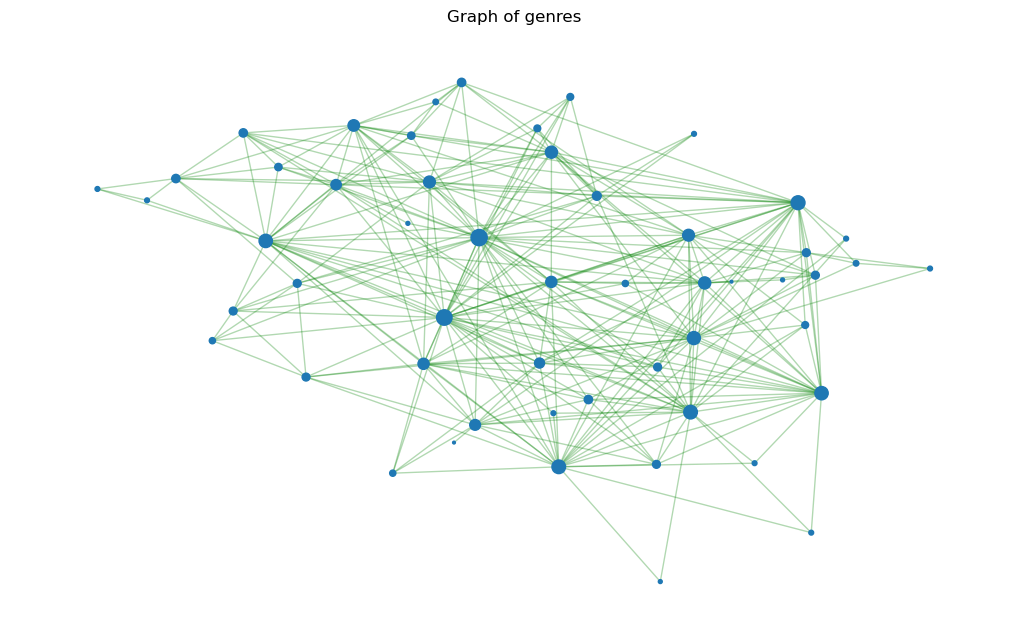

The genres with the largest degree centrality of the decade is:
['pop', 'r&b', 'rock', 'soul', 'gospel']


In [227]:
# Create graph
g_genre_60 = create_genre_decade_graph(1960)

# Stats
stat_genre_60 = get_stats(g_genre_60)

# Plot
plt_graph_genre(g_genre_60)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_60)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 86
Number of edges: 367
Average degree: 8.53


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 4513.51it/s]


BarnesHut Approximation  took  0.11  seconds
Repulsion forces  took  0.22  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


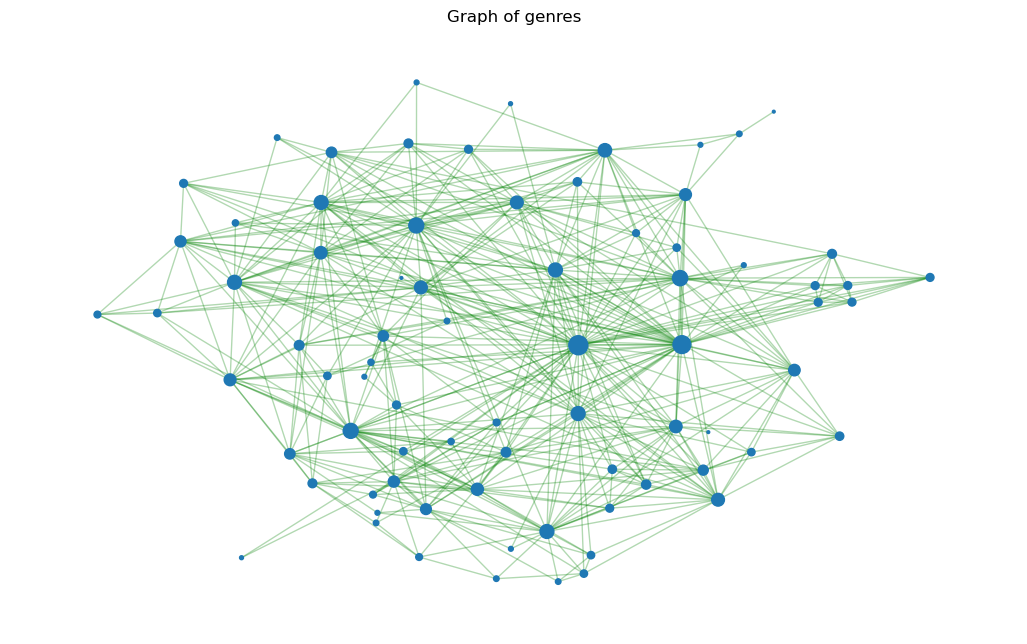

The genres with the largest degree centrality of the decade is:
['rock', 'pop', 'folk', 'r&b', 'pop rock']


In [228]:
# Create graph
g_genre_70 = create_genre_decade_graph(1970)

# Stats
stat_genre_70 = get_stats(g_genre_70)

# Plot
plt_graph_genre(g_genre_70)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_70)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 78
Number of edges: 231
Average degree: 5.92


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 4863.06it/s]


BarnesHut Approximation  took  0.10  seconds
Repulsion forces  took  0.20  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


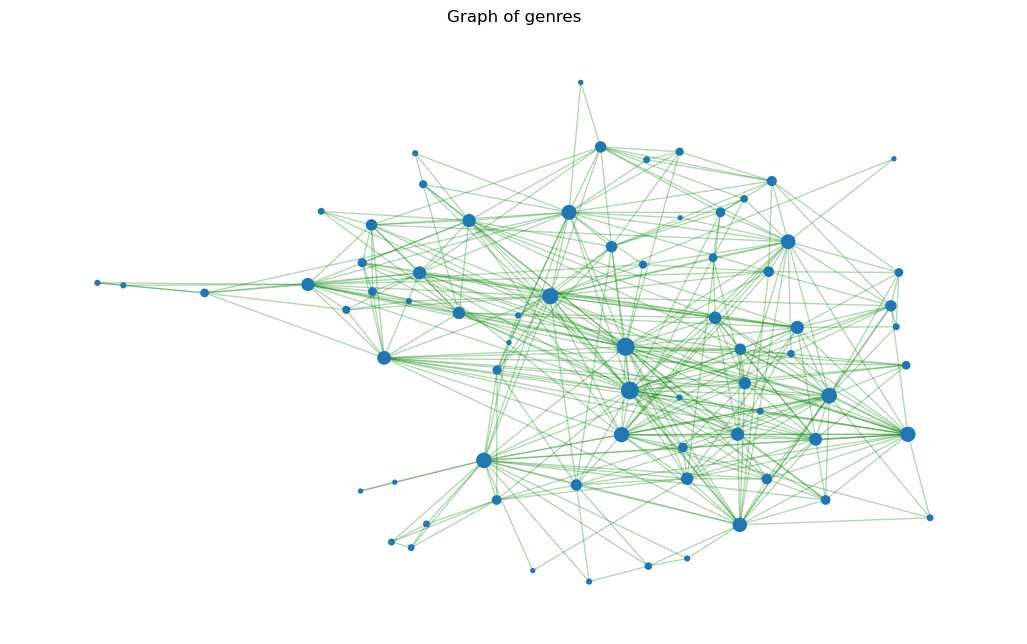

The genres with the largest degree centrality of the decade is:
['rock', 'soul', 'hip hop', 'pop', 'new wave']


In [229]:
# Create graph
g_genre_80 = create_genre_decade_graph(1980)

# Stats
stat_genre_80 = get_stats(g_genre_80)

# Plot
plt_graph_genre(g_genre_80)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_80)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 78
Number of edges: 217
Average degree: 5.56


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 4488.03it/s]


BarnesHut Approximation  took  0.10  seconds
Repulsion forces  took  0.22  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.04  seconds


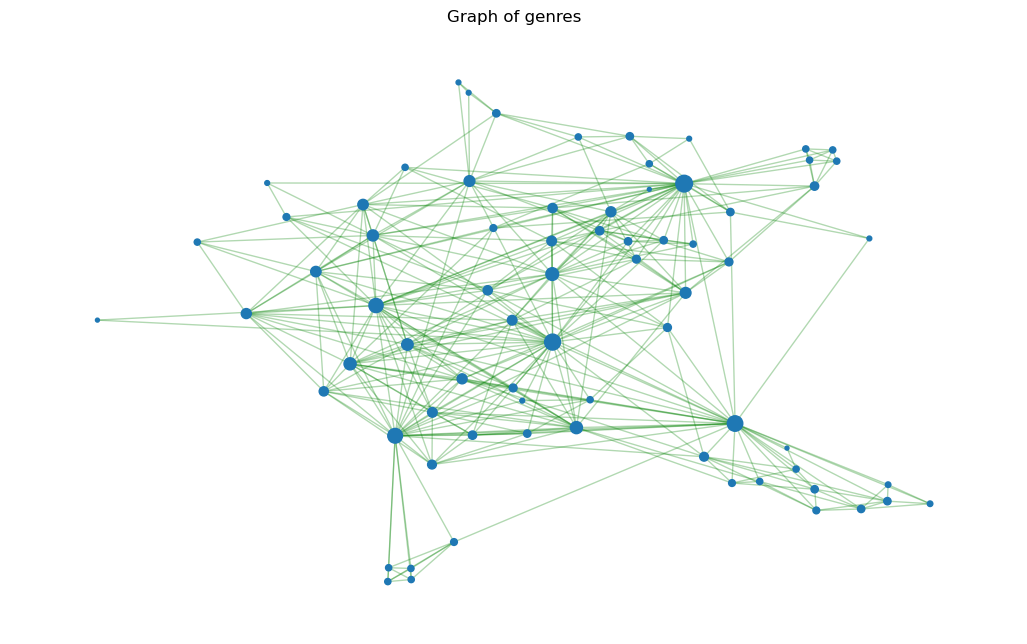

The genres with the largest degree centrality of the decade is:
['alternative rock', 'hip hop', 'r&b', 'pop', 'folk rock']


In [230]:
# Create graph
g_genre_90 = create_genre_decade_graph(1990)

# Stats
stat_genre_90 = get_stats(g_genre_90)

# Plot
plt_graph_genre(g_genre_90)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_90)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 37
Number of edges: 100
Average degree: 5.41


100%|████████████████████████████████████| 2000/2000 [00:00<00:00, 10591.60it/s]

BarnesHut Approximation  took  0.05  seconds
Repulsion forces  took  0.07  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


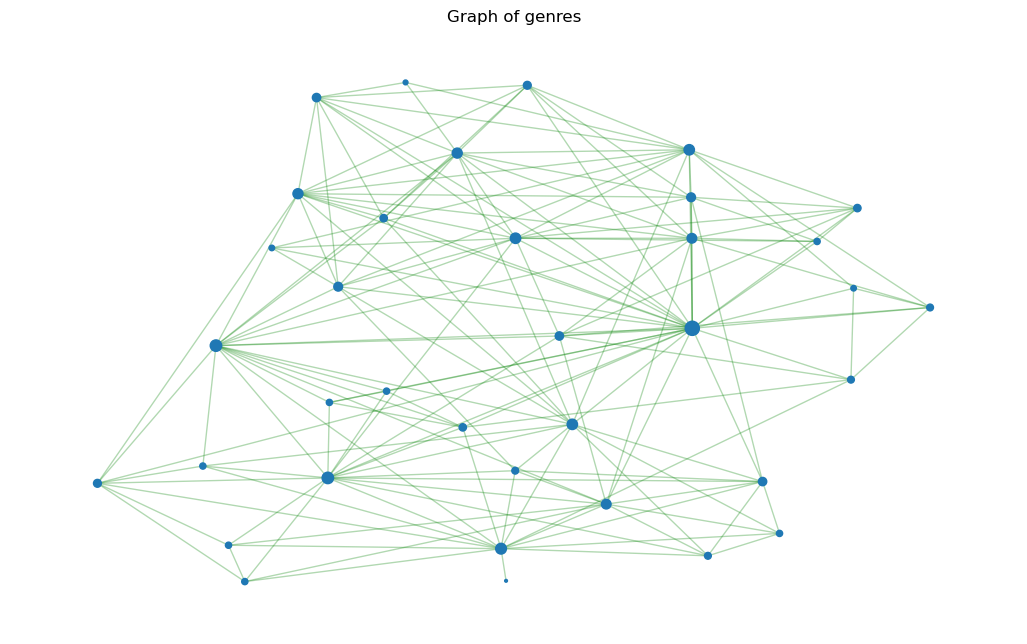

The genres with the largest degree centrality of the decade is:
['pop', 'alternative rock', 'indie rock', 'hip hop', 'r&b']


In [231]:
# Create graph
g_genre_00 = create_genre_decade_graph(2000)

# Stats
stat_genre_00 = get_stats(g_genre_00)

# Plot
plt_graph_genre(g_genre_00)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_00)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

Number of nodes: 40
Number of edges: 116
Average degree: 5.8


100%|████████████████████████████████████| 2000/2000 [00:00<00:00, 11903.99it/s]

BarnesHut Approximation  took  0.04  seconds
Repulsion forces  took  0.06  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.02  seconds


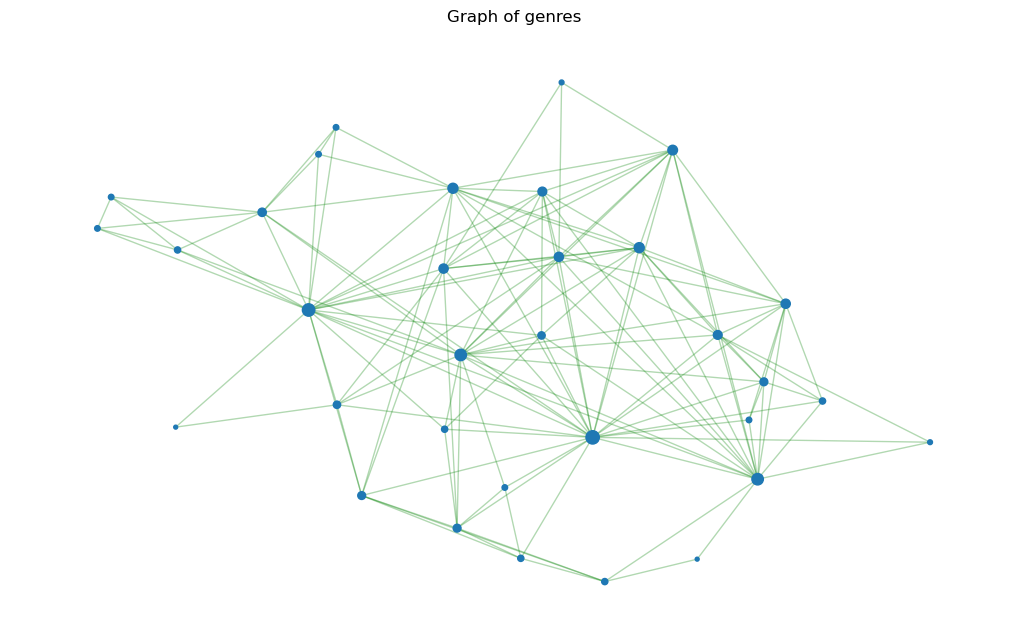

The genres with the largest degree centrality of the decade is:
['pop', 'hip hop', 'pop rock', 'trap', 'disco']


In [232]:
# Create graph
g_genre_10 = create_genre_decade_graph(2010)

# Stats
stat_genre_10 = get_stats(g_genre_10)

# Plot
plt_graph_genre(g_genre_10)

# Centrality
print("The genres with the largest degree centrality of the decade is:")
degree_centrality = nx.degree_centrality(g_genre_10)
print(list(dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)))[0:5])

In [233]:
stat_decades_genre = pd.DataFrame({'50' : stat_genre_50, '60' : stat_genre_60, '70' : stat_genre_70, 
                             '80' : stat_genre_80, '90' : stat_genre_90, '00' : stat_genre_00, 
                             '10' : stat_genre_10})

In [234]:
new_stat_decades_genre = stat_decades_genre.T

new_stat_decades_genre.index.name = 'decade'
new_stat_decades_genre.reset_index(inplace=True)

new_stat_decades_genre = new_stat_decades_genre.set_axis(['decade', 'n_nodes', 'n_edges', 'avg_deg'], 
                                                         axis=1, inplace=False)
new_stat_decades_genre

decade  n_nodes  n_edges  avg_deg
0     50     21.0     55.0     5.24
1     60     58.0    203.0     7.00
2     70     86.0    367.0     8.53
3     80     78.0    231.0     5.92
4     90     78.0    217.0     5.56
5     00     37.0    100.0     5.41
6     10     40.0    116.0     5.80

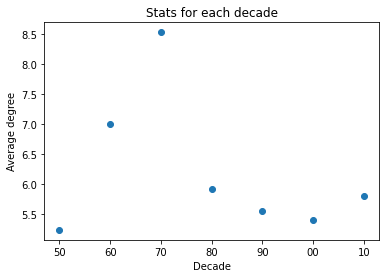

In [235]:
plt.scatter(new_stat_decades_genre.iloc[:,0], new_stat_decades_genre.iloc[:,3])
plt.title('Stats for each decade')
plt.xlabel('Decade')
plt.ylabel('Average degree')
plt.show()

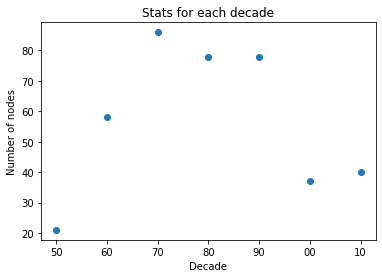

In [236]:
plt.scatter(new_stat_decades_genre.iloc[:,0], new_stat_decades_genre.iloc[:,1])
plt.title('Stats for each decade')
plt.ylabel('Number of nodes')
plt.xlabel('Decade')
plt.show()

The average degree is high in the 60's and 70's. This seem not just to be due to the number of nodes, as the 80's and 90's also contain a high number of nodes.  
This indicates that the best songs of the 60's and 70's combined a larger variety of genres, compared to later years.

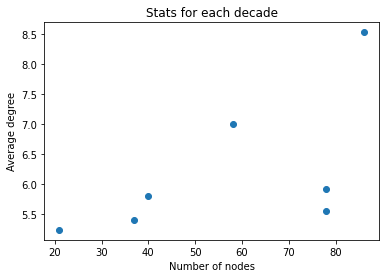

In [245]:
plt.scatter(stat_decades_genre.iloc[0,:], stat_decades_genre.iloc[2,:])
plt.title('Stats for each decade')
plt.xlabel('Number of nodes')
plt.ylabel('Average degree')
plt.show()

The above plots of the degrees and number of nodes in the graphs for each decade showed that the 60's and 70's had a higher degree which didn't seem due to the number of nodes. This indicates that gneres were combined in more ways compared to more recent decates.  

# Sentiment Analysis

This link explains how to get into Genius Music API.
https://melaniewalsh.github.io/Intro-Cultural-Analytics/04-Data-Collection/07-Genius-API.html

billboard 
https://www.billboard.com/charts/year-end/2020/hot-100-songs/

collect songs function
https://towardsdatascience.com/song-lyrics-genius-api-dcc2819c29

lyrics genius songs
https://pythonrepo.com/repo/johnwmillr-LyricsGenius-python-third-party-apis-wrappers

nice explanations of genius

https://melaniewalsh.github.io/Intro-Cultural-Analytics/04-Data-Collection/08-Collect-Genius-Lyrics.html#save-lyrics-to-txt-file

good data analysis and sentiment
https://github.com/sharpie-007/dataAndMusic/blob/master/49%20Years%20of%20Music%20-%20Collection%20and%20Analysis.ipynb

In [4]:
import lyricsgenius
token = "vG7hYwaMgE090QbDeOm9U7ZNzwqeIaLVP9RDI3srd3AkMwRjypmmmw484HWff9TB"
genius = lyricsgenius.Genius(token)
import requests

get max six songs and lyrics from each artist

Functions to get songs from an artist  and save it to a txt

In [5]:
from bs4 import BeautifulSoup
import re
import lyricsgenius
import requests
from pathlib import Path

In [6]:
def clean_up(song_title):

    if "Ft" in song_title:
        before_ft_pattern = re.compile(".*(?=\(Ft)")
        song_title_before_ft = before_ft_pattern.search(song_title).group(0)
        clean_song_title = song_title_before_ft.strip()
        clean_song_title = clean_song_title.replace("/", "-")
    
    else:
        song_title_no_lyrics = song_title.replace("Lyrics", "")
        clean_song_title = song_title_no_lyrics.strip()
        clean_song_title = clean_song_title.replace("/", "-")
    
    return clean_song_title

In [7]:
def get_lyrics(arr, k, file):  # Write lyrics of k songs by each artist in arr
    c = 0  # Counter
    f = open(file, "w") 
    for name in arr:
        try:
            songs = (genius.search_artist(name, max_songs=k, sort='popularity')).songs
            s = [song.lyrics for song in songs]
            f.write("{{"+ name + "}}" )
            f.write("\n \n   <|endoftext|>   \n \n".join(s))  # Deliminator
            c += 1
            print(f, songs, name)
            #print(f"Songs grabbed:{len(s)}")
        except:  #  Broad catch which will give us the name of artist and song that threw the exception
            print(f"some exception at {name}: {c}")

In [10]:
files =["lyrics_" + str(decade)+".txt" for decade in range(1960, 2020, 10)]
files

['lyrics_1960.txt',
 'lyrics_1970.txt',
 'lyrics_1980.txt',
 'lyrics_1990.txt',
 'lyrics_2000.txt',
 'lyrics_2010.txt']

In [ ]:
for i, f in zip(range(1960, 2030, 10), files):
  list_artists  = list(set(all_artists[((all_artists.Year >= (i)) &(all_artists.Year <(i+10)))]["Artist"]))
  print(list_artists)
  #list_artists = list(set(all_artists[((all_artists.Year >= (i)) & (all_artists.Year <(i+10)))]))
  get_lyrics(list_artists, 5, f)

#Sentiment analysis

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
!pip install vaderSentiment

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 125 kB 5.4 MB/s 


In [7]:
#All the libraries needed along the code will be imported here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Create dataset Zelda
import re as re
import json
import csv
import os
import urllib.request

#Network tools
import networkx as nx
from fa2 import ForceAtlas2
#import powerlaw
import math
from community import community_louvain
import matplotlib.cm as cm

#NLP
import nltk
import string
from collections import Counter
from math import log, ceil
from collections import defaultdict
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

#Sentiment analysis
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [22]:
def tokenize_lyrics(f):
    output = []

    ### get text file ###
    if(os.path.exists(os.path.join(os.getcwd(), f))):
        with open(f, "rb") as f:
            print(f)
            lyrics = f.read().decode("utf-8")
        
        ### Tokenize ###
        #WPT = nltk.wordpunct_tokenize()
        #WPT = nltk.Tokenizer().tokenize
        tokenized_text = nltk.wordpunct_tokenize(lyrics)

        ### Filter out stopwords, signs, and words not in dictionary ###
        stopwords = nltk.corpus.stopwords.words('english')
        tokenized_text_noStopWords = [w for w in tokenized_text if w not in stopwords]
        tokenized_text_noStopWords_noPunkt = [w.strip(string.punctuation) for w in tokenized_text_noStopWords]
        tokenized_text_noStopWords_noPunkt_noEmpty = [w.lower() for w in tokenized_text_noStopWords_noPunkt if w != '']
        tokenized_text_noStopWords_noPunkt_noEmpty_clean = [w for w in tokenized_text_noStopWords_noPunkt_noEmpty if w not in ["Verse","Chorus", "text"]]
        wnl = nltk.WordNetLemmatizer()
        tokenized_text_lem = [wnl.lemmatize(w) for w in tokenized_text_noStopWords_noPunkt_noEmpty_clean]
        output = output + tokenized_text_lem
    return(output)

In [23]:
lyrics = []
for f in files:
  lyrics.append(tokenize_lyrics(f))


<_io.BufferedReader name='lyrics_1960.txt'>


UnicodeDecodeError: ignored

In [35]:
word_counts = []
unique_word_counts = []
output = []
for f in files:
    ### get text file ###
    if(os.path.exists(os.path.join(os.getcwd(), f))):
        with open(f, "rb") as f:
            lyrics = f.read()
            print(lyrics)


            #tokenized_text = nltk.wordpunct_tokenize(lyrics)
            tokenized_text = lyrics
            ### Filter out stopwords, signs, and words not in dictionary ###
            stopwords = nltk.corpus.stopwords.words('english')
            tokenized_text_noStopWords = [w for w in tokenized_text if w not in stopwords]
            tokenized_text_noStopWords_noPunkt = [str(w).strip(string.punctuation) for w in tokenized_text_noStopWords]
            tokenized_text_noStopWords_noPunkt_noEmpty = [w.lower() for w in tokenized_text_noStopWords_noPunkt if w != '']
            tokenized_text_noStopWords_noPunkt_noEmpty_clean = [w for w in tokenized_text_noStopWords_noPunkt_noEmpty if w not in ["Verse","Chorus", "text"]]
            wnl = nltk.WordNetLemmatizer()
            tokenized_text_lem = [wnl.lemmatize(w) for w in tokenized_text_noStopWords_noPunkt_noEmpty_clean]
            output = output + tokenized_text_lem

            word_counts.append(len(lyrics.split()))
            unique_word_counts.append(len(set(lyrics.split())))


output


b'{{Jackson 5}}[Intro: Michael Jackson]\r\nUh-huh huh huh huh\r\nLet me tell ya now\r\nUh-huh\r\n\r\n[Verse 1: Michael Jackson]\r\nWhen I had you to myself, I didn\'t want you around\r\nThose pretty faces always made you stand out in a crowd\r\nBut someone picked you from the bunch, one glance was all it took\r\nNow it\'s much too late for me to take a second look\r\n\r\n[Chorus: Michael Jackson & Jackson 5]\r\nOh, baby, give me one more chance (To show you that I love you)\r\nWon\'t you please let me (Back in your heart)\r\nOh, darlin\', I was blind to let you go (Let you go, baby)\r\nBut now since I see you in his arms (I want you back)\r\n\r\n[Post-Chorus: Michael Jackson & Jackson 5]\r\nYes, I do now (I want you back)\r\nOoh, ooh, baby (I want you back)\r\nYeah, yeah, yeah, yeah (I want you back)\r\nNa, na, na, na\r\n\r\n[Verse 2: Michael Jackson]\r\nTryin\' to live without your love is one long sleepless night\r\nLet me show you, girl, that I know wrong from right\r\nEvery street 

UnicodeDecodeError: ignored

In [33]:
output

['123',
 '123',
 '74',
 '97',
 '99',
 '107',
 '115',
 '111',
 '110',
 '32',
 '53',
 '125',
 '125',
 '91',
 '73',
 '110',
 '116',
 '114',
 '111',
 '58',
 '32',
 '77',
 '105',
 '99',
 '104',
 '97',
 '101',
 '108',
 '32',
 '74',
 '97',
 '99',
 '107',
 '115',
 '111',
 '110',
 '93',
 '13',
 '10',
 '85',
 '104',
 '45',
 '104',
 '117',
 '104',
 '32',
 '104',
 '117',
 '104',
 '32',
 '104',
 '117',
 '104',
 '32',
 '104',
 '117',
 '104',
 '13',
 '10',
 '76',
 '101',
 '116',
 '32',
 '109',
 '101',
 '32',
 '116',
 '101',
 '108',
 '108',
 '32',
 '121',
 '97',
 '32',
 '110',
 '111',
 '119',
 '13',
 '10',
 '85',
 '104',
 '45',
 '104',
 '117',
 '104',
 '13',
 '10',
 '13',
 '10',
 '91',
 '86',
 '101',
 '114',
 '115',
 '101',
 '32',
 '49',
 '58',
 '32',
 '77',
 '105',
 '99',
 '104',
 '97',
 '101',
 '108',
 '32',
 '74',
 '97',
 '99',
 '107',
 '115',
 '111',
 '110',
 '93',
 '13',
 '10',
 '87',
 '104',
 '101',
 '110',
 '32',
 '73',
 '32',
 '104',
 '97',
 '100',
 '32',
 '121',
 '111',
 '117',
 '32',
 '116',

In [16]:
unique_word_counts
word_counts

[76963, 142772, 80697, 108291, 47320, 53510]

# Good but not working code Sentiment Analalysis

So this code does everything we want for sentiment analysis. It gets all the data from billboard from 1970 to 2020 . It finds the songs and does many sentiment analysis over the years, words, number of bad words...
It would be lovely if it works but I cannot understand the error.  will try to adapt this code to the on we have on top. 

It comes from this github:  https://github.com/sharpie-007/dataAndMusic/blob/master/49%20Years%20of%20Music%20-%20Collection%20and%20Analysis.ipynb

In [ ]:
!pip install lyricsGenius

     |████████████████████████████████| 59 kB 5.4 MB/s 


In [8]:
import pandas as pd
import numpy as np
import requests
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
import lyricsgenius as genius
import sys
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import PorterStemmer
from datetime import datetime
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy
from collections import Counter
from os import path
from PIL import Image
from keras.models import model_from_json
import pickle
pd.options.mode.chained_assignment = None
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format = 'png'

In [9]:
def collect_songs_from_billboard(start_year,end_year):
    '''This function takes in a start year and and end year, then iterates through each year to 
    pull song data from billboard or bobborst as needed. Then it uses beautiful soup to clean
    the data. Finally it stores the cleaned data in a dataframe and returns it
    
    Parameters:
    
    start_year (int): the year to start at.
    end_year (int): the year to end at.
    Returns: 
    
    dataframe.
    '''
    
    years = np.arange(start_year, end_year + 1).astype(int)
    dataset = pd.DataFrame()
    url_list = []
    all_years = pd.DataFrame()
    ### Billboard doesn't have it's own complete results from 1970 to 2016,
    ### so we'll use bobborst.com as our primary and collect from billboard as needed
    alternate_site_collection_range = np.arange(start_year, 2017)
    #URL Constructor
    for i in range (0, len(years)):
        url_list.append("https://www.billboard.com/charts/year-end/" + str(years[i]) + "/hot-100-songs")      
    for i in range(0, len(url_list)):
        if years[i] in alternate_site_collection_range:
            sys.stdout.write("\r" + "Collecting Songs from " +str(years[i]) + " via http://www.bobborst.com")
            sys.stdout.flush()    
            url = "http://www.bobborst.com/popculture/top-100-songs-of-the-year/?year=" + str(years[i])
            page = requests.get(url)
            soup = BeautifulSoup(page.content, "html.parser")
            table = soup.find('table', {'class': 'sortable alternate songtable'})
            rows = table.find_all('tr')
            for j in range(2,102):
                columns = rows[j].find_all('td')
                #print(columns)
                row = {
                    "Rank": columns[0].get_text(strip=True),
                    "Artist": columns[1].get_text(strip=True),
                    "Song Title": columns[2].get_text(strip=True),
                    "Year": years[i]
                }
                dataset = dataset.append(row, ignore_index=True)
            
        else:
            sys.stdout.write("\r" + "Collecting Songs from " +str(years[i]) + " via https://www.billboard.com")
            sys.stdout.flush()
            url = "https://www.billboard.com/charts/year-end/" + str(years[i]) + "/hot-100-songs"
            page = requests.get(url)
            soup = BeautifulSoup(page.content, "html.parser")
            all_ranks = soup.find_all("div", class_="ye-chart-item__rank")
            all_titles = soup.find_all('div', class_="ye-chart-item__title")
            all_artists = soup.find_all("div", class_="ye-chart-item__artist")
            for j in range (0, len(all_ranks)):
                row = {
                    "Rank": all_ranks[j].get_text(strip=True),
                    "Song Title": all_titles[j].get_text(strip=True),
                    "Artist": all_artists[j].get_text(strip=True),
                    "Year": years[i]
                }
                dataset = dataset.append(row, ignore_index=True)
    dataset['Year'] = dataset['Year'].astype(int)
    return dataset

In [10]:
def plot_year_counts(dataset, X, y, title):
    '''Function to plot the year count summaries.
    
    Parameters:

    dataset (dataframe): pandas dataframe
    X (string): the x axis column
    y (string): the y axis column
    title (string): the title of the chart
    
    Outputs a matplotlib lineplot
    '''
    characteristics = dataset.groupby(X).count()
    mpl.rcParams['figure.figsize'] = (35,10,)
    #all_songs.groupby('Year').count().plot(kind='bar')
    sns.barplot(y=characteristics[y], x=characteristics.index)
    plt.title(title)
    plt.ylabel("Number of Songs")
    plt.xticks(rotation=90)

In [11]:
def add_spacy_data(dataset, feature_column):
    '''
    Grabs the verb, adverb, noun, and stop word Parts of Speech (POS) 
    tokens and pushes them into a new dataset. returns an 
    enriched dataset.
    
    Parameters:
    
    dataset (dataframe): the dataframe to parse
    feature_column (string): the column to parse in the dataset.
    
    Returns: 
    dataframe
    '''
    
    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    nlp = spacy.load('en_core_web_sm')
    ##
    for i in range (0, len(dataset)):
        print("Extracting verbs and topics from record {} of {}".format(i+1, len(dataset)), end = "\r")
        song = dataset.iloc[i][feature_column]
        doc = nlp(song)
        spacy_dataframe = pd.DataFrame()
        for token in doc:
            if token.lemma_ == "-PRON-":
                    lemma = token.text
            else:
                lemma = token.lemma_
            row = {
                "Word": token.text,
                "Lemma": lemma,
                "PoS": token.pos_,
                "Stop Word": token.is_stop
            }
            spacy_dataframe = spacy_dataframe.append(row, ignore_index = True)
        verbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values))
        nouns.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values))
        adverbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values))
        corpus_clean = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["Stop Word"] == False].values)
        corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)   
        corpus.append(corpus_clean)
    dataset['Verbs'] = verbs
    dataset['Nouns'] = nouns
    dataset['Adverbs'] = adverbs
    dataset['Corpus'] = corpus
    return dataset

In [12]:
def prep_corpus(raw_string):
    '''Single use of add_spacy_data to enable pipelining 
    data into predictions
    
    Parameters:
    raw_string (string): String to be parsed
    
    Returns:
    parsed string
    '''

    verbs = []
    nouns = []
    adverbs = []
    corpus = []
    nlp = spacy.load('en_core_web_sm')

    doc = nlp(raw_string)
    spacy_dataframe = pd.DataFrame()
    for token in doc:
        if token.lemma_ == "-PRON-":
                lemma = token.text
        else:
            lemma = token.lemma_
        row = {
            "Word": token.text,
            "Lemma": lemma,
            "PoS": token.pos_,
            "Stop Word": token.is_stop
        }
        spacy_dataframe = spacy_dataframe.append(row, ignore_index = True)
    verbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "VERB"].values))
    nouns.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "NOUN"].values))
    adverbs.append(" ".join(spacy_dataframe["Lemma"][spacy_dataframe["PoS"] == "ADV"].values))
    corpus_clean = " ".join(spacy_dataframe["Lemma"][spacy_dataframe["Stop Word"] == False].values)
    corpus_clean = re.sub(r'[^A-Za-z0-9]+', ' ', corpus_clean)   

    return corpus_clean

In [13]:
def wordcloud(text, max_words):
    '''
    Wrapper around Wordcloud that increases quality, picks a specific font,
    and puts it on a white background
    '''
    
    wordcloud = WordCloud(font_path='C:\WINDOWS\FONTS\PERTILI.TTF',
                          width = 4000,
                          height = 3000,
                          background_color="white",
                          max_words = max_words                          
                         ).generate(text)
    plt.figure(figsize=(40,25))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    return;

In [14]:
def map_popular_terms(dataset, feature_column, year_column):
    '''Function that counts the frequency of occurences of words in a dataset
    column. Returns a new dataset with those frequencies'''
    frequencies = pd.DataFrame()
    years = dataset[year_column].unique().tolist()
    for i in range (0, len(years)):
        year_corpus = str(dataset[feature_column][dataset[year_column] == years[i]].tolist())
        tokens = year_corpus.split(" ")
        counts = Counter(tokens)
        frequencies = frequencies.append({
            "Year": years[i],
            "Most Common Terms": counts.most_common(n=100)
        }, ignore_index=True)
    frequencies['Year'] = frequencies['Year'].astype(int)
    return frequencies

In [15]:
def map_common_words(dataset):
    '''Maps common words from across multiple columns in a dataset to 
    identify terms that show up in all columns. Normally used with the 
    outputs of map_popular_terms. returns the common words'''
    common_words = []
    for words in dataset['Most Common Terms'][0]:
        common_words.append(words[0])

    for i in range (0, len(dataset)):
        check_list = []
        year_list = dataset['Most Common Terms'][i]
        for words in year_list:
            check_list.append(words[0])
        common_words = [x for x in common_words if x  in check_list]
    return common_words

In [16]:
def get_common_frequency(term_list, frequency_list):
    '''Finds the frequency of occurence of terms in a list and then
    returns them in a new dataframe organized by year'''
    common_word_frequency_per_year = pd.DataFrame()
    for i in range(0, len(term_list)):
        word_frequency = []
        for j in range(0, len(frequency_list)):
            current_year = frequency_list['Year'][j]
            current_year_terms = frequency_list['Most Common Terms'][j]
            for words in current_year_terms:
                    if term_list[i] in words[0]:
                        word_frequency.append(words[1])
                        #print(words[1])
                        break
        current_word = term_list[i]
        common_word_frequency_per_year[str(current_word)] = word_frequency
    common_word_frequency_per_year["Year"] = np.arange(1970,2019)
    common_word_frequency_per_year = common_word_frequency_per_year.set_index("Year")
    return common_word_frequency_per_year

In [17]:
all_songs = collect_songs_from_billboard(1970, 2018)

ConnectionError: ignored